https://www.kaggle.com/datasets/yagunnersya/fifa-21-messy-raw-dataset-for-cleaning-exploring/data?select=fifa21_raw_data.csv


About Dataset
Context
Kaggle is notorious for providing pure, clean datasets ready for analysis and model building.

So here I present to you a veeeeery messy and raw dataset of EA Sports' latest installment of their hit FIFA series - FIFA21, which I scraped from sofifa.com

Content
One of the challenges of web scraping is unclean data, and it natural, really. Different front-end developers write the HTML their own way, and that makes the incoming data unpredictable.

You'll definitely learn a lot about data cleaning with this dataset.

Acknowledgements
A huge round of applause for sofifa.com for providing this amazing data!

Inspiration
Convert the height and weight columns to numerical forms
Remove the unnecessary newline characters from all columns that have them.
Based on the 'Joined' column, check which players have been playing at a club for more than 10 years!
'Value', 'Wage' and "Release Clause' are string columns. Convert them to numbers. For eg, "M" in value column is Million, so multiply the row values by 1,000,000, etc.
Some columns have 'star' characters. Strip those columns of these stars and make the columns numerical
Which players are highly valuable but still underpaid (on low wages)? (hint: scatter plot between wage and value)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Set plot style to ggplot2
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('../data/fifa21 raw data v2.csv', low_memory=False)

# Initial Observations


In [5]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [7]:
# Basic Information
print(df.shape)
print(df.dtypes.value_counts())

(18979, 77)
int64     54
object    23
Name: count, dtype: int64


In [8]:
# Descriptive Statistics for numerical features
df.describe()


,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.00000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,66.751726,248.938142,49.688392,45.842405,51.942726,58.768112,42.696507,256.479214,55.587491,47.246957,42.391011,52.725381,58.528373,317.718689,64.357553,64.412930,63.366721,61.655619,63.925865,296.605195,57.801676,64.577375,62.653986,64.786922,46.785236,254.199747,55.591285,46.394489,50.298962,53.857105,48.057906,58.07366,139.909268,46.559197,47.705622,45.644449,81.436693,16.416302,16.207124,16.076453,16.217187,16.519627,1595.286949,355.702197,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934
std,27141.054157,4.710520,6.968999,6.114635,6.747193,74.299428,18.131153,19.567081,17.294409,14.519106,17.646937,78.650601,18.761314,18.207790,17.227947,15.178151,16.565892,55.879046,14.889981,14.638743,14.596277,9.072114,14.062285,50.732390,13.308747,11.844870,15.804223,12.488672,19.300534,64.595613,17.140414,20.698078,19.428701,13.708574,15.655999,12.07911,61.219472,20.139324,21.367690,20.922087,84.665579,17.554194,16.816305,16.491103,17.002239,17.854079,269.874789,40.761117,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883
min,41.000000,16.000000,47.000000,47.000000,48.000000,42.000000,6.000000,3.000000,5.000000,7.000000,3.000000,40.000000,5.000000,4.000000,5.000000,5.000000,5.000000,122.000000,13.000000,12.000000,14.000000,24.000000,12.000000,122.000000,18.000000,15.000000,12.000000,16.000000,4.000000,50.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.00000,20.000000,3.000000,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,210135.000000,21.000000,61.000000,67.000000,62.000000,222.000000,38.000000,30.000000,44.000000,54.000000,30.000000,222.000000,49.000000,35.000000,31.000000,43.000000,54.000000,289.000000,57.000000,57.000000,55.000000,56.000000,56.000000,264.000000,48.000000,58.000000,55.000000,57.000000,32.000000,227.500000,44.000000,25.000000,40.000000,45.000000,39.000000,50.00000,83.000000,29.000000,27.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,232418.000000,25.000000,66.000000,71.000000,67.000000,263.000000,54.000000,49.000000,55.000000,62.000000,44.000000,269.000000,61.000000,49.000000,41.000000,56.000000,63.000000,327.000000,67.000000,67.000000,66.000000,62.000000,66.000000,302.000000,59.000000,65.000000,66.000000,66.000000,51.000000,263.000000,58.000000,53.000000,55.000000,55.000000,49.000000,59.00000,159.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,246922.500000,29.000000,70.000000,75.000000,71.000000,297.

- Numerical Features: The dataset contains various player attributes like age, overall rating (↓ova), potential (pot), and many specific skills (e.g., crossing, finishing, dribbling). The age of players ranges from 16 to 53, with an average around 25. The overall rating ranges from 47 to 93, indicating a wide variety of player skills.


In [10]:
# Descriptive Statistics for categorical features
df.describe(include='object')

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Contract,Positions,Height,Weight,Preferred Foot,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,W/F,SM,A/W,D/W,IR,Hits
count,18979,18979,18979,18979,18979,18979,18979,18979,18979,18979,18979,18979,18979,1013,18979,18979,18979,18979,18979,18979,18979,18979,16384
unique,17920,18852,18979,18979,164,682,131,640,62,79,2,15,1869,24,255,134,1216,5,5,3,3,5,439
top,J. Rodríguez,Danny Rose,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,England,No Club,2019 ~ 2021,CB,180cm,70kg,Right,CB,"Jul 1, 2019","Jun 30, 2021",€1.2M,€2K,€0,3 ★,2★,Medium,Medium,1 ★,1
freq,13,3,1,1,1705,237,1706,2441,1474,1495,14445,3686,1344,770,582,2899,1261,11695,9142,12701,13956,17629,2337


- Categorical Features: Key categorical features include player names, nationalities, and club names. There are 17,920 unique player names and 164 unique nationalities, indicating a diverse set of players. The 'hits' column, which might indicate popularity or some performance metric, has 2,595 missing values.


In [12]:
# Missing Values
missing_values = df.isnull().sum().sort_values(ascending=False)

missing_values.head(10)  # Displaying only the top 10 columns with most missing values

Loan Date End      17966
Hits                2595
GK Diving              0
Sliding Tackle         0
Standing Tackle        0
Marking                0
Defending              0
Composure              0
Penalties              0
Vision                 0
dtype: int64

Missing Values:
- Loan Date End: The 'loan_date_end' column has the most missing values (17,966), which is expected as not all players are on loan.
- Hits: The 'hits' column has 2,595 missing values, which may need further investigation or imputation.

In [14]:
# Renaming columns: Convert to snake-case.  replacing spaces with underscores and converting to lowercase
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

# Displaying the new column names
# df.columns.tolist()


In [15]:
df.head()

,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


# Data Cleaning Plan
    
1. Handling Missing Values:
    - Decision Making: Decide whether to fill missing values (imputation), drop them, or leave them as-is based on the column's relevance and the nature of its data.
2. Correcting Data Types:
    - Review Data Types: Ensure each column's data type makes sense for its content (e.g., numeric, categorical).
    - Convert Data Types: Change data types where necessary, such as converting strings to numbers or dates.
3. Cleaning Text and Categorical Data:
    - Trim Spaces: Remove extra spaces from string data, which are common in scraped data.
    - Consistent Case: Ensure text data is consistent (e.g., all lower case) to avoid duplication based on case differences.
    - Category Reduction: For columns with many categories, consider grouping less common categories into an 'Other' category.
4. Handling Special Characters:
    - Rename Columns: Columns like '↓ova' might need renaming for easier access and interpretation.
    - Clean Values: Ensure that values within columns are clean and consistent, removing or interpreting special characters as necessary.
5. Dealing with Outliers:
    - Identify Outliers: Check for outliers in numerical data that might skew your analysis.
    - Decision Making: Decide whether to cap, remove, or otherwise adjust these outliers.
6. Dropping Irrelevant Columns:
    - Assess Relevance: Determine if all columns are necessary for your analysis or if some can be dropped to simplify the dataset.
7. Ensuring Consistency:
    - Check for Duplicates: Ensure there are no duplicate rows or unnecessary repeated information.
    - Standardize Formats: Ensure that data like dates and categorizations are consistently formatted.


## 1. Handling Missing Values

### 1.1 'loan_date_end': 
Since 94.66% of the values are missing, and this column indicates whether a player is on loan, we'll create a boolean indicator variable. This variable will be True if the player is on loan (i.e., the 'loan_date_end' is not missing) and False, otherwise.


In [19]:
# Step 1.1: Create a boolean for 'loan_date_end'
df['is_on_loan'] = df['loan_date_end'].notna().astype(bool)

df['is_on_loan'].value_counts()

#df['is_on_loan']

is_on_loan
False    17966
True      1013
Name: count, dtype: int64

'loan_date_end' (now 'is_on_loan'): There are 1,013 players on loan (True), and 17,966 that are not (False).

In [21]:
df.isna().sum()

id                      0
name                    0
longname                0
photourl                0
playerurl               0
nationality             0
age                     0
↓ova                    0
pot                     0
club                    0
contract                0
positions               0
height                  0
weight                  0
preferred_foot          0
bov                     0
best_position           0
joined                  0
loan_date_end       17966
value                   0
wage                    0
release_clause          0
attacking               0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                 0
skill                   0
dribbling               0
curve                   0
fk_accuracy             0
long_passing            0
ball_control            0
movement                0
acceleration            0
sprint_speed            0
agility                 0
reactions   

### 1.2. 'hits': 
This column represents the sofifa page views and may or may not be important depending on the analysis. With 13.67% missing, we can impute these missing values. A common approach is to use the median or mean, but we should first check the distribution to decide.

In [23]:
# Step 1.2: Examine the distribution of 'hits'
print(df['hits'].describe())


count     16384
unique      439
top           1
freq       2337
Name: hits, dtype: object


This column is not numerical as initially assumed; it's categorical with 450 unique values, and the most common value is '1'. Before deciding on imputation, it's essential to convert this to a numerical format and understand its distribution.


In [25]:
# Convert 'hits' to numeric, coercing errors to NaN (which will then be imputed)
df['hits'] = pd.to_numeric(df['hits'], errors='coerce')

# Now, let's examine the distribution of 'hits' to decide on the imputation method
df['hits'].describe()



count    16356.000000
mean        22.824407
std         62.818120
min          1.000000
25%          2.000000
50%          5.000000
75%         15.000000
max        979.000000
Name: hits, dtype: float64

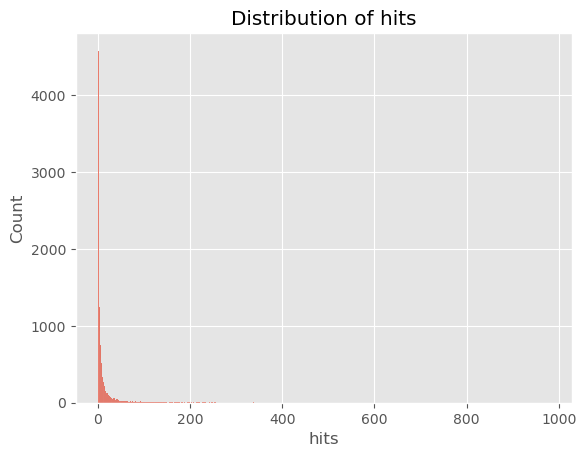

In [26]:
sns.histplot(data=df, x='hits')
plt.title('Distribution of hits')
plt.show()

- Given the right-skewed distribution, the median is likely a more robust measure for imputation than the mean.

In [28]:
# Fill na values with median
median_hits = df['hits'].median()
df['hits'].fillna(median_hits, inplace=True)


In [29]:
df['hits'].isna().sum()

0

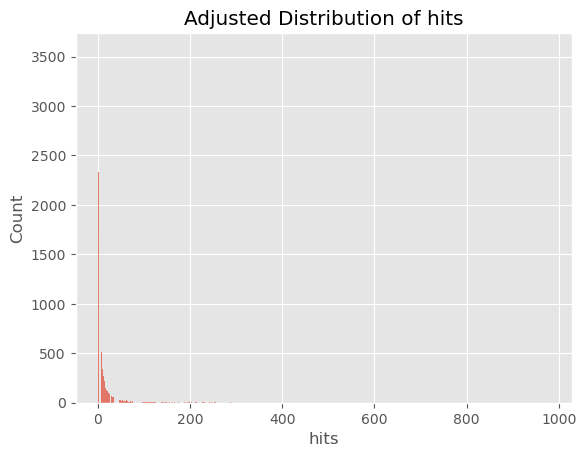

In [30]:
sns.histplot(data=df, x='hits')
plt.title('Adjusted Distribution of hits')
plt.show()

## 2. Correcting Data Types

In [32]:
print(df.dtypes)


id                    int64
name                 object
longname             object
photourl             object
playerurl            object
nationality          object
age                   int64
↓ova                  int64
pot                   int64
club                 object
contract             object
positions            object
height               object
weight               object
preferred_foot       object
bov                   int64
best_position        object
joined               object
loan_date_end        object
value                object
wage                 object
release_clause       object
attacking             int64
crossing              int64
finishing             int64
heading_accuracy      int64
short_passing         int64
volleys               int64
skill                 int64
dribbling             int64
curve                 int64
fk_accuracy           int64
long_passing          int64
ball_control          int64
movement              int64
acceleration        

Here are the current data types of the columns in the dataset:
- Integer (int64): Most numerical columns like 'id', 'dri', 'def', 'phy', 'is_on_loan', etc., are already in integer format, which seems appropriate for ratings and other numerical attributes.
- Floating Point (float64): The 'hits' column is now a float, which is suitable for its imputed values.
- Object (string): Textual and categorical columns like 'name', 'long_name', 'photo_url', etc., are of object type.

### 2.1 Date Columns: 
2.1.1: Any columns representing dates (like 'joined' or 'loan_date_end'), should be converted to datetime format for easier manipulation and analysis.


In [35]:
df.head()

,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,contract,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,is_on_loan
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771.0,False
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562.0,False
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150.0,False
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207.0,False
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595.0,False


Parse 'Joined' and 'Loan Date End' Dates: Convert these to a consistent date format.

In [37]:
# Convert 'joined' to datetime
df['joined'] = pd.to_datetime(df['joined'], errors='coerce')

# Convert 'loan_date_end' to datetime and fill missing values with NaT
df['loan_date_end'] = pd.to_datetime(df['loan_date_end'], errors='coerce').dt.normalize()


# Verify the conversion
print(df['joined'].dtype)
print(df['loan_date_end'].dtype)



datetime64[ns]
datetime64[ns]


The 'joined' and 'loan_date_end' columns have been successfully converted to datetime format.  This will make any analysis involving dates much more straightforward, such as calculating durations or filtering by specific time periods.

2.1.2  **contract:** Should be a year:
- will split into contract start and end dates and change dtype to DateTime or Categorical.


In [40]:
df['contract'].unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [41]:
import pandas as pd
import numpy as np


# Revised function to correctly handle single-year entries as both start and end years
def clean_and_split_contract(entry):
    '''
    - Two Years Found: Sets both years respectively.
    - One Year Found: Assumes it is the start year and also the end year unless 'On Loan' is present.
    - Contains 'Free': Marks both years as 'Free'.
    - Contains 'On Loan': Always sets end year to 'On Loan', regardless of the number of years extracted.
    - No or More than Two Years (or malformed format): Uses NaN for start year and sets end year to 'On Loan' if specified.
    '''
    
    # First, check for 'Free' to handle these separately
    if 'Free' in entry:
        return pd.Series(['Free', 'Free'])

    # Check if 'On Loan' is part of the entry
    on_loan_present = 'On Loan' in entry

    # Extract all year numbers
    years = pd.Series(entry).str.extractall(r'(\d{4})')[0].unique()

    # Determine what to return based on the number of years found and 'On Loan' status
    if len(years) == 2:
        return pd.Series([years[0], years[1]])
    elif len(years) == 1:
        if on_loan_present:
            return pd.Series([years[0], 'On Loan'])
        else:
            return pd.Series([years[0], years[0]])  # Use the same year for both start and end
    elif on_loan_present:
        return pd.Series([np.nan, 'On Loan'])
    else:
        return pd.Series([np.nan, np.nan])

# Apply the revised function and create new columns
df[['contract_start_year', 'contract_end_year']] = df['contract'].apply(clean_and_split_contract)

# Drop original contract column since redundant
df = df.drop('contract', axis=1)


print(df[['contract_start_year', 'contract_end_year']].head())



  contract_start_year contract_end_year
0                2004              2021
1                2018              2022
2                2014              2023
3                2015              2023
4                2017              2022


In [42]:
nan_count = df['contract_start_year'].isna().sum()
print(f"Number of entries with NaN in contract_start year: {nan_count}")


Number of entries with NaN in contract_start year: 0


In [43]:
print(df['contract_start_year'].unique())


['2004' '2018' '2014' '2015' '2017' '2016' '2013' '2011' '2009' '2005'
 '2010' '2012' '2019' '2020' '2008' '2007' '2021' 'Free' '2002' '2022'
 '2006' '2003' '2023' '1998']


In [44]:
nan_count = df['contract_end_year'].isna().sum()
print(f"Number of entries with NaN in contract_end year: {nan_count}")

Number of entries with NaN in contract_end year: 0


In [45]:
print(df['contract_end_year'].unique())

['2021' '2022' '2023' '2024' '2025' '2026' 'On Loan' 'Free' '2028' '2020'
 '2027']


In [46]:
df[df['contract_end_year'].isna()].head()

,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,is_on_loan,contract_start_year,contract_end_year


In [48]:
df.head()

,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,positions,height,weight,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,is_on_loan,contract_start_year,contract_end_year
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,"RW, ST, CF",170cm,72kg,Left,93,RW,2004-07-01,NaT,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771.0,False,2004,2021
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,"ST, LW",187cm,83kg,Right,92,ST,2018-07-10,NaT,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562.0,False,2018,2022
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,GK,188cm,87kg,Right,91,GK,2014-07-16,NaT,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150.0,False,2014,2023
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,"CAM, CM",181cm,70kg,Right,91,CAM,2015-08-30,NaT,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207.0,False,2015,2023
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,"LW, CAM",175cm,68kg,Right,91,LW,2017-08-03,NaT,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595.0,False,2017,2022


In [49]:
# value, wage, and release_cluse are in Euros.  Will handle in sec 4 - Handling Special Characters

df[['value', 'wage', 'release_clause']].head()

,value,wage,release_clause
0,€103.5M,€560K,€138.4M
1,€63M,€220K,€75.9M
2,€120M,€125K,€159.4M
3,€129M,€370K,€161M
4,€132M,€270K,€166.5M


In [50]:
df.select_dtypes(include=['category', 'object']).columns

Index(['name', 'longname', 'photourl', 'playerurl', 'nationality', 'club',
       'positions', 'height', 'weight', 'preferred_foot', 'best_position',
       'value', 'wage', 'release_clause', 'w/f', 'sm', 'a/w', 'd/w', 'ir',
       'contract_start_year', 'contract_end_year'],
      dtype='object')

In [51]:
df.dtypes

id                              int64
name                           object
longname                       object
photourl                       object
playerurl                      object
nationality                    object
age                             int64
↓ova                            int64
pot                             int64
club                           object
positions                      object
height                         object
weight                         object
preferred_foot                 object
bov                             int64
best_position                  object
joined                 datetime64[ns]
loan_date_end          datetime64[ns]
value                          object
wage                           object
release_clause                 object
attacking                       int64
crossing                        int64
finishing                       int64
heading_accuracy                int64
short_passing                   int64
volleys     

### 2.2 Convert 'Height' and 'Weight' to Numeric: 

In [53]:
import pandas as pd
import numpy as np
import re

# Function to extract numeric value and unit from a string
def extract_numeric_and_unit(value):
    # Check if the value is in the format "6'2""
    match = re.search(r"(\d+)'(\d+)\"", value)
    if match:
        feet = int(match.group(1))
        inches = int(match.group(2))
        total_inches = feet * 12 + inches
        return total_inches, 'in'
    
    # If not in the feet and inches format, try the previous regex pattern
    match = re.search(r'(\d+\.?\d*)\s*(\w+)', value)
    if match:
        numeric_value = float(match.group(1))
        unit = match.group(2)
        return numeric_value, unit
    
    return np.nan, np.nan

# Function to convert height to inches
def convert_height_to_inches(value, unit):
    if pd.notna(value):
        if unit == 'cm':
            return value * 0.393701
        elif unit == 'ft':
            return value * 12
        elif unit == 'in':
            return value
    return np.nan

# Function to convert weight to pounds
def convert_weight_to_pounds(value, unit):
    if pd.notna(value):
        if unit == 'kg':
            return value * 2.20462
        elif unit == 'lbs':
            return value
    return np.nan

# Apply extraction and conversion for 'height'
if 'height' in df.columns:
    df[['height_value', 'height_unit']] = df['height'].apply(lambda x: pd.Series(extract_numeric_and_unit(x)))
    df['height_in_inches'] = df.apply(lambda row: convert_height_to_inches(row['height_value'], row['height_unit']), axis=1)

# Apply extraction and conversion for 'weight'
if 'weight' in df.columns:
    df[['weight_value', 'weight_unit']] = df['weight'].apply(lambda x: pd.Series(extract_numeric_and_unit(x)))
    df['weight_in_pounds'] = df.apply(lambda row: convert_weight_to_pounds(row['weight_value'], row['weight_unit']), axis=1)

# Drop temporary and unnecessary columns
columns_to_drop = ['height', 'height_value', 'height_unit', 'weight', 'weight_value', 'weight_unit']
df.drop(columns=columns_to_drop, inplace=True)

# Display the DataFrame to check the changes
print(df.head())


       id               name                      longname  \
0  158023           L. Messi                  Lionel Messi   
1   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2  200389           J. Oblak                     Jan Oblak   
3  192985       K. De Bruyne               Kevin De Bruyne   
4  190871          Neymar Jr    Neymar da Silva Santos Jr.   

                                           photourl  \
0  https://cdn.sofifa.com/players/158/023/21_60.png   
1  https://cdn.sofifa.com/players/020/801/21_60.png   
2  https://cdn.sofifa.com/players/200/389/21_60.png   
3  https://cdn.sofifa.com/players/192/985/21_60.png   
4  https://cdn.sofifa.com/players/190/871/21_60.png   

                                           playerurl nationality  age  ↓ova  \
0  http://sofifa.com/player/158023/lionel-messi/2...   Argentina   33    93   
1  http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal   35    92   
2  http://sofifa.com/player/200389/jan-oblak/210006/    Slo

In [54]:
df.dtypes

id                              int64
name                           object
longname                       object
photourl                       object
playerurl                      object
nationality                    object
age                             int64
↓ova                            int64
pot                             int64
club                           object
positions                      object
preferred_foot                 object
bov                             int64
best_position                  object
joined                 datetime64[ns]
loan_date_end          datetime64[ns]
value                          object
wage                           object
release_clause                 object
attacking                       int64
crossing                        int64
finishing                       int64
heading_accuracy                int64
short_passing                   int64
volleys                         int64
skill                           int64
dribbling   

### 2.3 Convert Most Objects to Categorical DType

Clean and Standardize Categorical and Rating Columns: Such as 'Preferred Foot', 'W/F', 'SM', 'A/W', 'D/W', and 'IR'.

In [57]:
# Identifying potential categorical columns (object type columns)
# Identify potential categorical columns (object type columns)
potential_categorical_cols = df.select_dtypes(include=['object']).columns

# Print potential categorical columns
print("Object Dtypes before conversion:", potential_categorical_cols)

# Exclude specific columns by name
cols_to_exclude = ['value', 'wage', 'release_clause']
selected_cols = potential_categorical_cols.difference(cols_to_exclude)

# Convert these columns to categorical dtype
for col in selected_cols:
    df[col] = df[col].astype('category')
    

# Check the conversion result
print("Categorical Dtypes after conversion:")
print(df.select_dtypes(include=['category']).columns)

Object Dtypes before conversion: Index(['name', 'longname', 'photourl', 'playerurl', 'nationality', 'club',
       'positions', 'preferred_foot', 'best_position', 'value', 'wage',
       'release_clause', 'w/f', 'sm', 'a/w', 'd/w', 'ir',
       'contract_start_year', 'contract_end_year'],
      dtype='object')
Categorical Dtypes after conversion:
Index(['name', 'longname', 'photourl', 'playerurl', 'nationality', 'club',
       'positions', 'preferred_foot', 'best_position', 'w/f', 'sm', 'a/w',
       'd/w', 'ir', 'contract_start_year', 'contract_end_year'],
      dtype='object')


In [58]:
df.dtypes

id                              int64
name                         category
longname                     category
photourl                     category
playerurl                    category
nationality                  category
age                             int64
↓ova                            int64
pot                             int64
club                         category
positions                    category
preferred_foot               category
bov                             int64
best_position                category
joined                 datetime64[ns]
loan_date_end          datetime64[ns]
value                          object
wage                           object
release_clause                 object
attacking                       int64
crossing                        int64
finishing                       int64
heading_accuracy                int64
short_passing                   int64
volleys                         int64
skill                           int64
dribbling   

In [59]:
# Missing Values
missing_values = df.isnull().sum().sort_values(ascending=False)

missing_values.head(10)

# loan_end date uses Nan for rows without a loan_date_end

loan_date_end      17966
id                     0
gk_reflexes            0
gk_kicking             0
gk_handling            0
gk_diving              0
goalkeeping            0
sliding_tackle         0
standing_tackle        0
marking                0
dtype: int64

## 3. Cleaning Text and Categorical Data


In [61]:
df.head()

,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,positions,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,is_on_loan,contract_start_year,contract_end_year,height_in_inches,weight_in_pounds
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,"RW, ST, CF",Left,93,RW,2004-07-01,NaT,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771.0,False,2004,2021,66.929170,158.73264
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,"ST, LW",Right,92,ST,2018-07-10,NaT,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562.0,False,2018,2022,73.622087,182.98346
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,GK,Right,91,GK,2014-07-16,NaT,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150.0,False,2014,2023,74.015788,191.80194
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,"CAM, CM",Right,91,CAM,2015-08-30,NaT,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207.0,False,2015,2023,71.259881,154.32340
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,"LW, CAM",Right,91,LW,2017-08-03,NaT,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595.0,False,2017,2022,68.897675,149.91416


### 3.1. Trim Spaces:
Extra spaces at the beginning or end of strings can occur during data entry or extraction. These can lead to issues with matching and analysis.

In [63]:
# Trim spaces for object type columns
object_cols = df.select_dtypes(include=['object', 'category']).columns
for col in object_cols:
    df[col] = df[col].str.strip()


In [64]:
import pandas as pd

# Assume df is your DataFrame
print("Unique IDs:", df['id'].nunique())
print("Total IDs:", df['id'].count())
print("Unique longnames:", df['longname'].nunique())
print("Total longnames:", df['longname'].count())

# Display duplicates for IDs
duplicate_ids = df[df['id'].duplicated(keep=False)]
print("Duplicate IDs:", duplicate_ids)

# Display duplicates for longnames
duplicate_longnames = df[df['longname'].duplicated(keep=False)]
print("Duplicate longnames:", duplicate_longnames)




Unique IDs: 18979
Total IDs: 18979
Unique longnames: 18852
Total longnames: 18979
Duplicate IDs: Empty DataFrame
Columns: [id, name, longname, photourl, playerurl, nationality, age, ↓ova, pot, club, positions, preferred_foot, bov, best_position, joined, loan_date_end, value, wage, release_clause, attacking, crossing, finishing, heading_accuracy, short_passing, volleys, skill, dribbling, curve, fk_accuracy, long_passing, ball_control, movement, acceleration, sprint_speed, agility, reactions, balance, power, shot_power, jumping, stamina, strength, long_shots, mentality, aggression, interceptions, positioning, vision, penalties, composure, defending, marking, standing_tackle, sliding_tackle, goalkeeping, gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes, total_stats, base_stats, w/f, sm, a/w, d/w, ir, pac, sho, pas, dri, def, phy, hits, is_on_loan, contract_start_year, contract_end_year, height_in_inches, weight_in_pounds]
Index: []
Duplicate longnames:            id        

# 3.2. Standardize Case:
Inconsistent casing (mix of uppercase and lowercase) in text data can lead to the same category being treated as different ones.

# 3.3. Simplify Categories:
Categorical columns with a large number of unique values (high cardinality) can complicate analysis and modeling.

3.4. Remove or Replace Special Characters:  Clean up special characters in text columns.


In [68]:
# Identify Text Columns
text_columns = df.select_dtypes(include=['object']).columns

# Replace the 'Star' Character
for col in text_columns:
    df[col] = df[col].str.replace('★', '', regex=False)

# 3. Display the first few rows to verify the changes
df.head()


,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,positions,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,is_on_loan,contract_start_year,contract_end_year,height_in_inches,weight_in_pounds
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,"RW, ST, CF",Left,93,RW,2004-07-01,NaT,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771.0,False,2004,2021,66.929170,158.73264
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,"ST, LW",Right,92,ST,2018-07-10,NaT,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562.0,False,2018,2022,73.622087,182.98346
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,GK,Right,91,GK,2014-07-16,NaT,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150.0,False,2014,2023,74.015788,191.80194
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,"CAM, CM",Right,91,CAM,2015-08-30,NaT,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207.0,False,2015,2023,71.259881,154.32340
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,"LW, CAM",Right,91,LW,2017-08-03,NaT,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595.0,False,2017,2022,68.897675,149.91416


### 3.5 Correct issues with Club name formatting

In [70]:
# Define the function to find non-ASCII clubs
def find_non_ascii_clubs(clubs):
    """Identify club names containing non-ASCII characters."""
    non_ascii_clubs = [club for club in clubs if any(ord(char) > 127 for char in club)]
    return non_ascii_clubs

#### 3.5.1 Normalize Non-ASCII Characters


In [72]:
# Accent mapping for normalizing non-ASCII characters
accent_mapping = {
    'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'ü': 'u', 'ñ': 'n', 'ß': 'ss', 'ö': 'o', 'ä': 'a',
    'ë': 'e', 'ç': 'c', 'ą': 'a', 'ę': 'e', 'ł': 'l', 'ś': 's', 'ź': 'z', 'ż': 'z', 'ø': 'o', 'å': 'a',
    'œ': 'oe', 'ė': 'e', 'ȯ': 'o', 'ű': 'u', 'ơ': 'o', 'ķ': 'k', 'ņ': 'n', 'ģ': 'g', 'š': 's', 'ž': 'z',
    'č': 'c', 'ř': 'r', 'đ': 'd', 'ț': 't', 'ļ': 'l', 'ğ': 'g', 'ı': 'i', 'Č': 'C', 'Ž': 'Z', 'Ş': 'S'
    # Add additional characters as necessary
}


def manual_normalize_club_names(club_names, mapping):
    """Replace non-ASCII characters in club names using a provided mapping."""
    normalized_names = {}
    for name in club_names:
        new_name = ''.join([mapping.get(char, char) for char in name])
        normalized_names[name] = new_name
    return normalized_names


# Normalize non-ASCII characters in club names
normalized_club_names = manual_normalize_club_names(df['club'], accent_mapping)
df['club'] = df['club'].replace(normalized_club_names)

#### 3.5.2 Map redudant Club names to avoid duplication

Remove Common Prefixes: Such as "FC", "CF", which are used interchangeably and don't usually affect the identification of the club.
Handle Regional Suffixes: For clubs with known regional suffixes that don't serve a distinguishing purpose, standardize the name to the most commonly used or recognized form.

In [75]:
import pandas as pd
import numpy as np
import re

def remove_initial_number_prefix(club_names):
    """Remove an initial numeric prefix like '1.' from club names."""
    return [re.sub(r'^\d+\.\s*', '', name) for name in club_names]

def standardize_club_names(club_names):
    """Standardizes club names by removing common prefixes, suffixes, and specific patterns."""
    standard_mapping = {
        ' fc': '', ' cf': '', ' sc': '', ' afc': '', ' f.c.': '', ' fc.': '', ' club': '', ' ac': '',
        ' sporting': '', ' sport': '', ' spor': '', ' sd': '', ' cd': '', ' ss': '', ' rb': '',
        ' u.c.': '', ' uc': '', ' as': '', ' a.s.': '', ' calcio': '', ' s.a.': '', ' sa': ''
    }
    standardized_names = {}
    for name in club_names:
        temp_name = ' ' + name.lower() + ' '  # Ensure edge cases are handled
        for key, value in standard_mapping.items():
            temp_name = temp_name.replace(key, value)
        standardized_names[name] = temp_name.strip().title()
    return standardized_names

# Remove initial numeric prefixes
df['club'] = remove_initial_number_prefix(df['club'])

# Apply the standardization function
unique_clubs = df['club'].unique()
standardized_names = standardize_club_names(unique_clubs)
df['club'] = df['club'].replace(standardized_names)

# Optionally, save the cleaned data to a new CSV file
df.to_csv('path_to_your_cleaned_dataset.csv', index=False)

# Display some of the cleaned data to verify
print(df['club'].unique()[:100])  # Adjust as needed to view more or fewer records


['Barcelona' 'Juventus' 'Atletico Madrid' 'Manchester City'
 'Parisint-Germain' 'Bayern Munchen' 'Liverpool' 'Real Madrid' 'Chelsea'
 'Tottenham Hotspur' 'Inter' 'Napoli' 'Borussia Dortmund'
 'Manchester United' 'Arsenal' 'Lazio' 'Leicester City'
 'Borussia Monchengladbach' 'Real Sociedad' 'Atalanta'
 'Olympique Lyonnais' 'Milan' 'Villarreal' 'Leipzig' 'Cagliari' 'Ajax'
 'Sl Benfica' 'Monaco' 'Wolverhampton Wanderers' 'Everton' 'Fiorentina'
 'Porto' 'Rc Celta' 'Torino' 'Sevilla' 'Grêmio' 'Real Betis' 'Roma'
 'Newcastle United' 'Eintracht Frankfurt' 'Valencia'
 'Medipol Başakşehir Fk' 'Inter Miami' 'Bayer 04 Leverkusen' 'Levante Ud'
 'Crystal Palace' 'Athletic De Bilbao' 'Shanghai Sipg' 'Vfl Wolfsburg'
 'Guangzhou Evergrande Taobao' 'Al Shabab' 'Olympique De Marseille'
 'Los Angeles' 'Beijing Sinobo Guoan' 'Getafe' 'Sv Werder Bremen'
 'Tsg 1899 Hoffenheim' 'Losc Lille' 'Deportivo Alaves' 'Burnley'
 'Leeds United' 'Fulham' 'Pfc Cska Moscow' 'Genoa' 'Galatasaray Sk'
 'Atlanta United' 'Atl

In [76]:
df['club'].value_counts().head(10)

club
No                        237
Barcelona                  63
Torino                     33
Real Betis                 33
Newcastle United           33
Valencia                   33
Levante Ud                 33
Crystal Palace             33
Olympique De Marseille     33
Tsg 1899 Hoffenheim        33
Name: count, dtype: int64

### 3.6 Remove Currency Symbols in Amount Columns

'Value', 'Wage', and 'Release Clause': These financial-related columns might include currency symbols and abbreviations like 'M' for million or 'K' for thousand. We'll standardize these into numeric values.

In [79]:
print(df[['value', 'wage', 'release_clause']].head())


     value   wage release_clause
0  €103.5M  €560K        €138.4M
1     €63M  €220K         €75.9M
2    €120M  €125K        €159.4M
3    €129M  €370K          €161M
4    €132M  €270K        €166.5M


In [80]:
import pandas as pd
import numpy as np

def clean_currency_advanced(currency_vals):
    # Handle NaN values upfront
    if pd.isna(currency_vals):
        return np.nan
    
    # Convert all inputs to strings to safely use string methods
    currency_vals = str(currency_vals)
    
    # Remove currency symbols and commas
    currency_vals = currency_vals.replace('$', '').replace('€', '').replace(',', '')
    
    # Convert K (thousands) and M (millions)
    if 'K' in currency_vals:
        value = float(currency_vals.replace('K', '')) * 1000
    elif 'M' in currency_vals:
        value = float(currency_vals.replace('M', '')) * 1000000
    else:
        value = float(currency_vals)

    # Convert to int and format with commas
    return value

# Assuming df is your DataFrame
# Apply the enhanced function to your columns
df['value'] = df['value'].apply(clean_currency_advanced)
df['wage'] = df['wage'].apply(clean_currency_advanced)
df['release_clause'] = df['release_clause'].apply(clean_currency_advanced)


### Convert these to numeric dtype
df[['value', 'wage', 'release_clause']].astype('int')

# Display the first few rows to verify the formatting
print(df[['value', 'wage', 'release_clause']].head(10))


         value      wage  release_clause
0  103500000.0  560000.0     138400000.0
1   63000000.0  220000.0      75900000.0
2  120000000.0  125000.0     159400000.0
3  129000000.0  370000.0     161000000.0
4  132000000.0  270000.0     166500000.0
5  111000000.0  240000.0     132000000.0
6  120500000.0  250000.0     144300000.0
7  102000000.0  160000.0     120300000.0
8  185500000.0  160000.0     203100000.0
9  110000000.0  260000.0     147700000.0


In [81]:
df.head()

,id,name,longname,photourl,playerurl,nationality,age,↓ova,pot,club,positions,preferred_foot,bov,best_position,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,is_on_loan,contract_start_year,contract_end_year,height_in_inches,weight_in_pounds
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,Barcelona,"RW, ST, CF",Left,93,RW,2004-07-01,NaT,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771.0,False,2004,2021,66.929170,158.73264
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,"ST, LW",Right,92,ST,2018-07-10,NaT,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562.0,False,2018,2022,73.622087,182.98346
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atletico Madrid,GK,Right,91,GK,2014-07-16,NaT,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150.0,False,2014,2023,74.015788,191.80194
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,"CAM, CM",Right,91,CAM,2015-08-30,NaT,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207.0,False,2015,2023,71.259881,154.32340
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Parisint-Germain,"LW, CAM",Right,91,LW,2017-08-03,NaT,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595.0,False,2017,2022,68.897675,149.91416


## 4. Handling Special Characters (Columns)

4.1. Identify Columns with Special Characters: Column names containing special characters or spaces. These might include characters like spaces, hyphens, slashes, or punctuation.



In [84]:
# Identify columns with special characters
special_char_columns = df.columns[df.columns.str.contains(r'[^a-zA-Z0-9_]')]

# Define a renaming strategy: converting to snake_case
def clean_column_name(name):
    name = re.sub(r'[^a-zA-Z0-9\s]', '', name)  # Remove special characters
    name = re.sub(r'\s+', '_', name)  # Replace spaces with underscores
    return name

# Create a mapping of old names to new names
new_column_names = {col: clean_column_name(col) for col in special_char_columns}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)

# Verify the changes
print(df.columns)


Index(['id', 'name', 'longname', 'photourl', 'playerurl', 'nationality', 'age',
       'ova', 'pot', 'club', 'positions', 'preferred_foot', 'bov',
       'best_position', 'joined', 'loan_date_end', 'value', 'wage',
       'release_clause', 'attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats',
       'base_stats', 'wf', 'sm', 'aw', 'dw', 'ir', 'pac', 'sho', 'pas', 'dri',
       'def', 'phy', 'hits', 'is_on_loan', 'contra

4.2. Define a Renaming Strategy: Ensure use of snake-case and update some descriptions that are not easily understandable.

In [86]:
abbreviated_column_mapping = {
    'ova': 'overall_rating',
    'pot': 'potential',
    'bov': 'best_overall_rating',
    'bp': 'best_position',
    'growth': 'growth_ova_minus_pot',
    'value': 'market_value_euros',
    'wage': 'weekly_wage_euros',
    'release_clause': 'release_clause_amount_euros',
    'gk_diving': 'goalkeeper_diving_skill',
    'gk_handling': 'goalkeeper_handling_skill',
    'gk_kicking': 'goalkeeper_kicking_skill',
    'gk_positioning': 'goalkeeper_positioning_skill',
    'gk_reflexes': 'goalkeeper_reflexes_skill',
    'wf': 'weak_foot_rating',
    'sm': 'skill_moves_rating',
    'aw': 'attacking_work_rate',
    'dw': 'defensive_work_rate',
    'ir': 'international_reputation',
    'pac': 'pace_rating',
    'sho': 'shooting_rating',
    'pas': 'passing_rating',
    'dri': 'dribbling_rating',
    'def': 'defending_rating',
    'phy': 'physicality_rating',
    'hits': 'sofifa_page_views'
}

# Apply the mapping to rename the columns
df.rename(columns=abbreviated_column_mapping, inplace=True)

# Display the first few rows to verify the changes
df.head()


,id,name,longname,photourl,playerurl,nationality,age,overall_rating,potential,club,positions,preferred_foot,best_overall_rating,best_position,joined,loan_date_end,market_value_euros,weekly_wage_euros,release_clause_amount_euros,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,goalkeeper_diving_skill,goalkeeper_handling_skill,goalkeeper_kicking_skill,goalkeeper_positioning_skill,goalkeeper_reflexes_skill,total_stats,base_stats,weak_foot_rating,skill_moves_rating,attacking_work_rate,defensive_work_rate,international_reputation,pace_rating,shooting_rating,passing_rating,dribbling_rating,defending_rating,physicality_rating,sofifa_page_views,is_on_loan,contract_start_year,contract_end_year,height_in_inches,weight_in_pounds
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,Barcelona,"RW, ST, CF",Left,93,RW,2004-07-01,NaT,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771.0,False,2004,2021,66.929170,158.73264
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,"ST, LW",Right,92,ST,2018-07-10,NaT,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562.0,False,2018,2022,73.622087,182.98346
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atletico Madrid,GK,Right,91,GK,2014-07-16,NaT,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150.0,False,2014,2023,74.015788,191.80194
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,"CAM, CM",Right,91,CAM,2015-08-30,NaT,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207.0,False,2015,2023,71.259881,154.32340
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Parisint-Germain,"LW, CAM",Right,91,LW,2017-08-03,NaT,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595.0,False,2017,2022,68.897675,149.91416


## 5. Dealing with Outliers

This code below uses the median for imputation, which tends to be more robust to outliers.

In [89]:
import numpy as np

# NEED TO REMOVE ID, AGE, AND DATE COLUMNS

# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Define a function to impute outliers based on the IQR method
def impute_outliers(df, col):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1

    # Define the boundaries for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Impute outliers with the median
    median_value = df[col].median()
    df[col] = np.where(df[col] > upper_bound, median_value, df[col])
    df[col] = np.where(df[col] < lower_bound, median_value, df[col])

    return df

# Apply the function to each numeric column
for col in numeric_cols:
    df = impute_outliers(df, col)

# Verify the changes
print(df.describe())  # Print the summary statistics to verify changes




                  id           age  overall_rating     potential  \
count   18979.000000  18979.000000    18979.000000  18979.000000   
mean   227872.717530     25.186258       65.583434     71.077928   
min    155266.000000     16.000000       48.000000     55.000000   
25%    211271.000000     21.000000       61.000000     67.000000   
50%    232418.000000     25.000000       66.000000     71.000000   
75%    246922.500000     29.000000       70.000000     75.000000   
max    259216.000000     41.000000       83.000000     87.000000   
std     23772.039517      4.694720        6.722973      5.885897   

       best_overall_rating                         joined  \
count         18979.000000                          18979   
mean             66.628063  2018-09-13 10:27:42.005374464   
min              49.000000            1998-01-01 00:00:00   
25%              62.000000            2018-01-08 12:00:00   
50%              67.000000            2019-06-25 00:00:00   
75%              71.0

## 6. Dropping Irrelevant Columns

Factors to consider:
    
1. Irrelevant Information
2. Redundant or Derived Data
3. Sparse Data
4. Low Variance
5. Are the columns necessary to my goals or irrelevent to my questions?

#### 6.1 Identify URL and Identifier Columns: 
Look for columns that contain URLs or specific identifiers that aren't necessary for your analysis.


In [93]:
# Example: Identifying columns that are likely URLs or identifiers
url_or_id_cols = [col for col in df.columns if 'url' in col]
print("URL or Identifier Columns:", url_or_id_cols)

# Drop photourl and playerurl columns - irrelevant columns
df.drop(['photourl', 'playerurl'], axis=1, inplace=True)


URL or Identifier Columns: ['photourl', 'playerurl']


In [94]:
df.columns

Index(['id', 'name', 'longname', 'nationality', 'age', 'overall_rating',
       'potential', 'club', 'positions', 'preferred_foot',
       'best_overall_rating', 'best_position', 'joined', 'loan_date_end',
       'market_value_euros', 'weekly_wage_euros',
       'release_clause_amount_euros', 'attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'goalkeeper_diving_skill',
       'goalkeeper_handling_skill', 'goalkeeper_kicking_skill',
       'goalkeeper_positioning_skill', 'goalkeeper_reflexes_skill',
       'total

In [95]:
# Drop name column as already included in longname

df.drop('name', axis=1, inplace=True)

In [96]:
df.head()

,id,longname,nationality,age,overall_rating,potential,club,positions,preferred_foot,best_overall_rating,best_position,joined,loan_date_end,market_value_euros,weekly_wage_euros,release_clause_amount_euros,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,goalkeeper_diving_skill,goalkeeper_handling_skill,goalkeeper_kicking_skill,goalkeeper_positioning_skill,goalkeeper_reflexes_skill,total_stats,base_stats,weak_foot_rating,skill_moves_rating,attacking_work_rate,defensive_work_rate,international_reputation,pace_rating,shooting_rating,passing_rating,dribbling_rating,defending_rating,physicality_rating,sofifa_page_views,is_on_loan,contract_start_year,contract_end_year,height_in_inches,weight_in_pounds
0,158023.0,Lionel Messi,Argentina,33.0,66.0,71.0,Barcelona,"RW, ST, CF",Left,67.0,RW,2004-07-01,NaT,950000.0,3000.0,1000000.0,263.0,85.0,95.0,70.0,62.0,88.0,269.0,96.0,93.0,41.0,91.0,63.0,451.0,91.0,80.0,91.0,62.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44.0,40.0,93.0,55.0,75.0,59.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8.0,2231.0,466.0,4,4,Medium,Low,5,85.0,92.0,58.0,64.0,38.0,65.0,5.0,False,2004,2021,66.929170,158.73264
1,232418.0,C. Ronaldo dos Santos Aveiro,Portugal,35.0,66.0,71.0,Juventus,"ST, LW",Right,67.0,ST,2018-07-10,NaT,950000.0,3000.0,1000000.0,263.0,84.0,95.0,90.0,82.0,86.0,414.0,88.0,81.0,76.0,77.0,63.0,431.0,87.0,91.0,87.0,62.0,71.0,302.0,94.0,95.0,84.0,78.0,93.0,353.0,63.0,29.0,95.0,82.0,84.0,59.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11.0,2221.0,464.0,4,5,High,Low,5,89.0,93.0,81.0,64.0,35.0,77.0,5.0,False,2018,2022,73.622087,182.98346
2,200389.0,Jan Oblak,Slovenia,27.0,66.0,71.0,Atletico Madrid,GK,Right,67.0,GK,2014-07-16,NaT,950000.0,3000.0,1000000.0,263.0,13.0,11.0,15.0,43.0,13.0,109.0,61.0,13.0,14.0,40.0,63.0,307.0,43.0,60.0,67.0,62.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34.0,19.0,11.0,65.0,11.0,68.0,57.0,27.0,12.0,18.0,53.0,11.0,11.0,11.0,11.0,11.0,1413.0,356.0,3,1,Medium,Medium,3,87.0,92.0,78.0,64.0,52.0,90.0,5.0,False,2014,2023,74.015788,191.80194
3,192985.0,Kevin De Bruyne,Belgium,29.0,66.0,71.0,Manchester City,"CAM, CM",Right,67.0,CAM,2015-08-30,NaT,950000.0,3000.0,1000000.0,407.0,94.0,82.0,55.0,62.0,82.0,441.0,88.0,85.0,83.0,93.0,63.0,398.0,77.0,76.0,78.0,62.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,263.0,76.0,66.0,88.0,55.0,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13.0,1627.0,356.0,5,4,High,High,4,76.0,86.0,58.0,64.0,64.0,78.0,5.0,False,2015,2023,71.259881,154.32340
4,190871.0,Neymar da Silva Santos Jr.,Brazil,28.0,66.0,71.0,Parisint-Germain,"LW, CAM",Right,67.0,LW,2017-08-03,NaT,950000.0,3000.0,1000000.0,408.0,85.0,87.0,62.0,87.0,87.0,269.0,95.0,88.0,89.0,81.0,63.0,453.0,94.0,89.0,96.0,62.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51.0,36.0,87.0,90.0,49.0,59.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11.0,2175.0,451.0,5,5,High,Medium,5,91.0,85.0,58.0,64.0,36.0,59.0,5.0,False,2017,2022,68.897675,149.91416


In [97]:
df.nunique()

id                              18729
longname                        18852
nationality                       164
age                                26
overall_rating                     36
potential                          33
club                              681
positions                         640
preferred_foot                      2
best_overall_rating                36
best_position                      15
joined                           1869
loan_date_end                      24
market_value_euros                 92
weekly_wage_euros                  29
release_clause_amount_euros       776
attacking                         290
crossing                           89
finishing                          93
heading_accuracy                   80
short_passing                      57
volleys                            88
skill                             347
dribbling                          75
curve                              91
fk_accuracy                        87
long_passing

#### 6.2. Check for High Correlation: 
Determine if there are pairs of columns with very high correlation, suggesting redundancy.

In [99]:
# Calculate correlation matrix only for numeric columns
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df.corr()  # Calculate correlation matrix

# Identify highly correlated pairs
highly_correlated_pairs = correlation_matrix.unstack().sort_values(ascending=False)
print("Highly Correlated Pairs:", highly_correlated_pairs[(highly_correlated_pairs > 0.9) & (highly_correlated_pairs < 1)])


Highly Correlated Pairs: defending            standing_tackle        0.988103
standing_tackle      defending              0.988103
defending            sliding_tackle         0.985254
sliding_tackle       defending              0.985254
overall_rating       best_overall_rating    0.976154
best_overall_rating  overall_rating         0.976154
sliding_tackle       standing_tackle        0.975795
standing_tackle      sliding_tackle         0.975795
defending            marking                0.967879
marking              defending              0.967879
defending            interceptions          0.954576
interceptions        defending              0.954576
standing_tackle      interceptions          0.947467
interceptions        standing_tackle        0.947467
sliding_tackle       interceptions          0.935889
interceptions        sliding_tackle         0.935889
standing_tackle      marking                0.928917
marking              standing_tackle        0.928917
defending_rating     

#### 6.3. Identify Sparse Columns: 
Identify columns with a high percentage of missing values.

In [101]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
sparse_columns = missing_percentage[missing_percentage > 60]  # Adjust the threshold as needed
print("Sparse Columns:", sparse_columns)


Sparse Columns: loan_date_end    94.662522
dtype: float64


Loan date should be sparse as most players do not have a loan

#### 6.4. Find Columns with Low Variance: 
Identify columns where almost all the values are the same.

In [104]:
# Identify columns with low variance
low_variance_cols = [col for col in df.columns if df[col].nunique() <= 1]
print("Low Variance Columns:", low_variance_cols)


Low Variance Columns: []


#### 6.5. Consider Specific Goals: 
Reflect on the columns' relevance to analysis goals and questions.

In [106]:
'''

# Combine all insights
columns_to_drop = set(url_or_id_cols + sparse_columns.index.tolist() + low_variance_cols)

# Review the columns to drop and make a final decision
print("Recommended Columns to Drop:", columns_to_drop)

'''

'\n\n# Combine all insights\ncolumns_to_drop = set(url_or_id_cols + sparse_columns.index.tolist() + low_variance_cols)\n\n# Review the columns to drop and make a final decision\nprint("Recommended Columns to Drop:", columns_to_drop)\n\n'

## 7. Ensuring Consistency

### 7.1. Check for Duplicate Rows:
Duplicate rows can skew the analysis, leading to incorrect conclusions. Identify and remove any duplicates.


#### 7.1.1 Full Duplicates

In [110]:
# Identify and drop duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()


Number of duplicate rows: 0


#### 7.1.2 Partial Duplicates

In [112]:
# Names not matching ID's
print("Unique IDs:", df['id'].nunique())
print("Total IDs:", df['id'].count())
print("Unique longnames:", df['longname'].nunique())
print("Total longnames:", df['longname'].count())

# Display duplicates for IDs
duplicate_ids = df[df['id'].duplicated(keep=False)]
print("Duplicate IDs:", duplicate_ids.head())

# Display duplicates for longnames
duplicate_longnames = df[df['longname'].duplicated(keep=False)]
print("Duplicate longnames:", duplicate_longnames.head())


Unique IDs: 18729
Total IDs: 18979
Unique longnames: 18852
Total longnames: 18979
Duplicate IDs:           id                      longname nationality   age  overall_rating  \
1   232418.0  C. Ronaldo dos Santos Aveiro    Portugal  35.0            66.0   
17  232418.0                 Sergio Agüero   Argentina  32.0            66.0   
39  232418.0             Giorgio Chiellini       Italy  35.0            66.0   
55  232418.0         Gerard Piqué Bernabeu       Spain  33.0            66.0   
59  232418.0               Alejandro Gómez   Argentina  32.0            66.0   

    potential             club    positions preferred_foot  \
1        71.0         Juventus       ST, LW          Right   
17       71.0  Manchester City           ST          Right   
39       87.0         Juventus           CB           Left   
55       86.0        Barcelona           CB          Right   
59       86.0         Atalanta  CAM, CF, ST          Right   

    best_overall_rating best_position     joined 

Identify Duplicate longname Values:

Identify which longname values are duplicated in the dataset and how many unique id values are associated with each.

In [114]:
import pandas as pd

# Assume df is your DataFrame
# Find the count of unique IDs for each longname
longname_id_counts = df.groupby('longname')['id'].nunique()
duplicate_longnames = longname_id_counts[longname_id_counts > 1]

print("Duplicate longnames and their ID counts:")
print(duplicate_longnames)


Duplicate longnames and their ID counts:
longname
Abdulaziz Majrashi      2
Abdullah Al Shammari    2
Adama Traoré            3
Adrián Martínez         2
Alan Medina             2
Alejandro Gómez         2
Alfie Jones             2
Andrés Andrade          2
Andrés Mosquera         2
Axel Sjöberg            2
Ben Davies              2
Boubacar Fofana         2
Carlos Rodríguez        2
Claudio Bravo           2
Conor Grant             2
Cristian Núñez          2
Cristian Álvarez        2
Daniel Hernández        2
Danny Rose              3
Danny Ward              2
Demba Thiam             2
Diego Rodríguez         3
Diego Sosa              2
Diego Torres            2
Edgar Pérez             2
Emiliano Martínez       2
Emmanuel Boateng        2
Enzo Díaz               2
Francisco Rodríguez     2
George Williams         2
Gideon Mensah           2
Gonzalo Castro          2
Greg Taylor             2
Guillermo Fernández     2
Héctor Pérez            2
Ibrahim Cissé           2
Ibrahim Sissok

Step 2: Investigate Specific Longnames
For each longname identified as duplicated, investigate the associated id values to ensure they are correct or to spot potential mismatches.

In [116]:
# Investigate a specific longname that has multiple IDs
specific_longname = 'Danny Rose'
specific_longname_records = df[df['longname'] == specific_longname]
print(specific_longname_records)


             id    longname nationality   age  overall_rating  potential  \
667    169595.0  Danny Rose     England  29.0            79.0       79.0   
12912  203500.0  Danny Rose     England  26.0            63.0       65.0   
13419  209268.0  Danny Rose     England  32.0            62.0       62.0   

                    club positions preferred_foot  best_overall_rating  \
667    Tottenham Hotspur   LB, LWB           Left                 79.0   
12912   Northampton Town        ST          Right                 65.0   
13419       Grimsby Town   CM, CDM           Left                 62.0   

      best_position     joined loan_date_end  market_value_euros  \
667              LB 2007-07-01           NaT            950000.0   
12912            ST 2020-10-02           NaT            600000.0   
13419            CM 2020-08-31           NaT            325000.0   

       weekly_wage_euros  release_clause_amount_euros  attacking  crossing  \
667               3000.0                    100

Since there are no duplicate IDs, and we have multiple records with the same longname but different IDs, it's crucial to maintain these records without introducing inconsistencies.

### 7.2 Standardize Formats:
Ensure that data within each column is consistently formatted, especially for dates, categorical data, and strings.


In [119]:
df.columns

Index(['id', 'longname', 'nationality', 'age', 'overall_rating', 'potential',
       'club', 'positions', 'preferred_foot', 'best_overall_rating',
       'best_position', 'joined', 'loan_date_end', 'market_value_euros',
       'weekly_wage_euros', 'release_clause_amount_euros', 'attacking',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing',
       'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility',
       'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'mentality', 'aggression', 'interceptions',
       'positioning', 'vision', 'penalties', 'composure', 'defending',
       'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping',
       'goalkeeper_diving_skill', 'goalkeeper_handling_skill',
       'goalkeeper_kicking_skill', 'goalkeeper_positioning_skill',
       'goalkeeper_reflexes_skill', 'total_stats', 'base_

In [120]:
# Ensure all dates are in the same format-handled previously

# Ensure categorical data is consistently formatted (already mostly handled in previous steps)



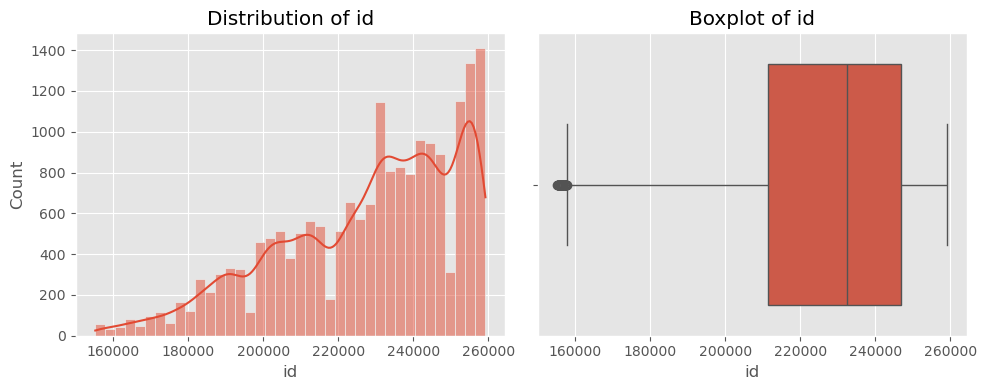

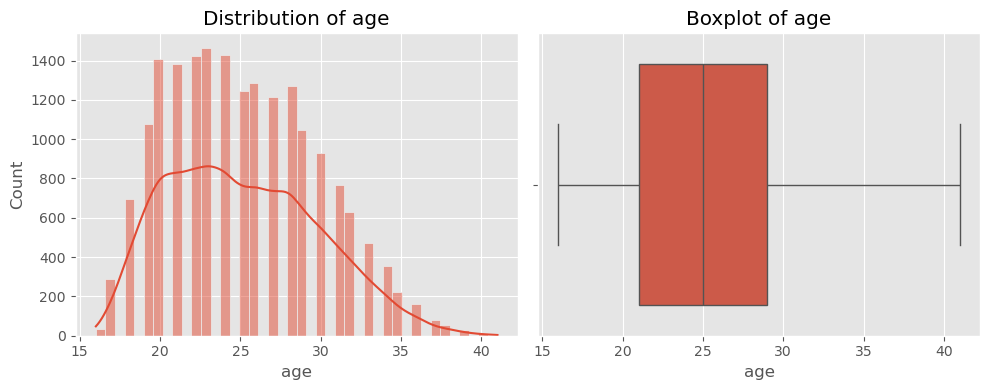

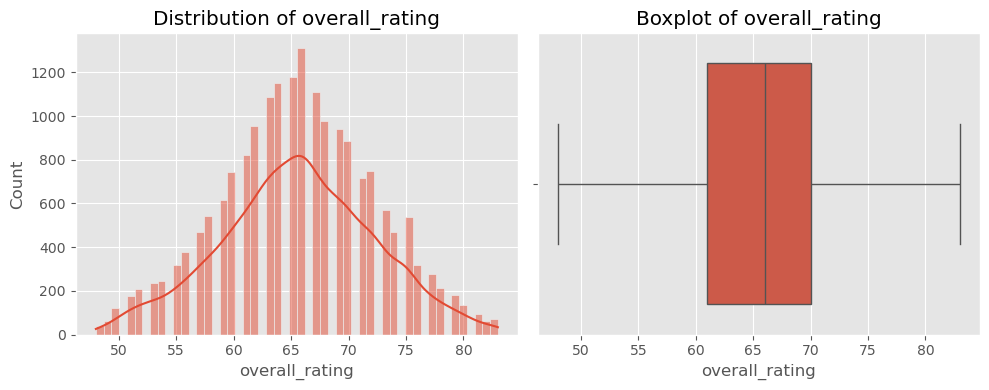

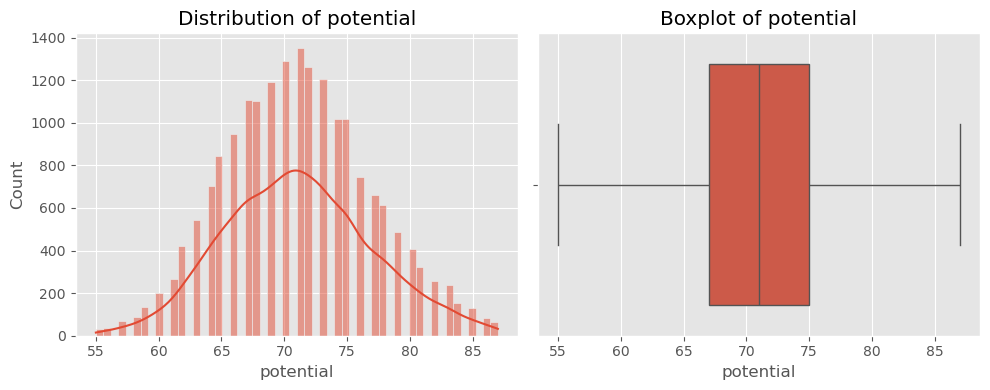

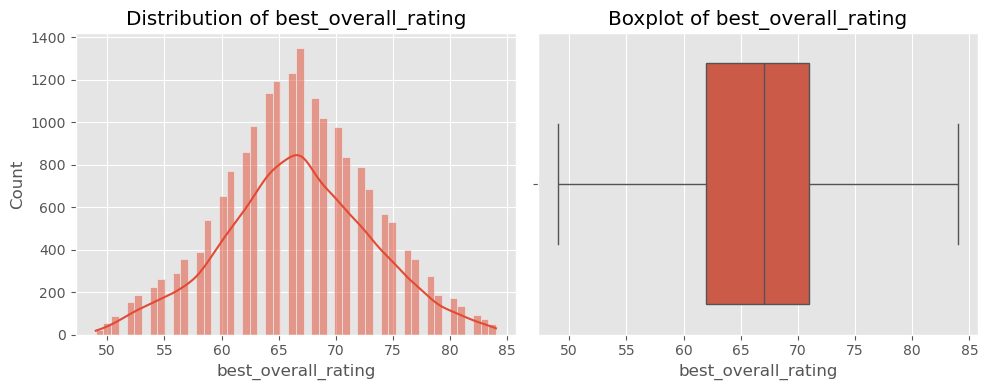

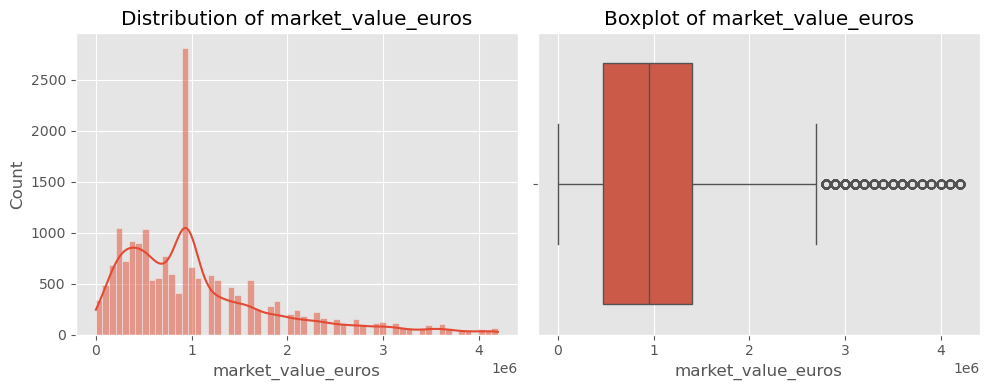

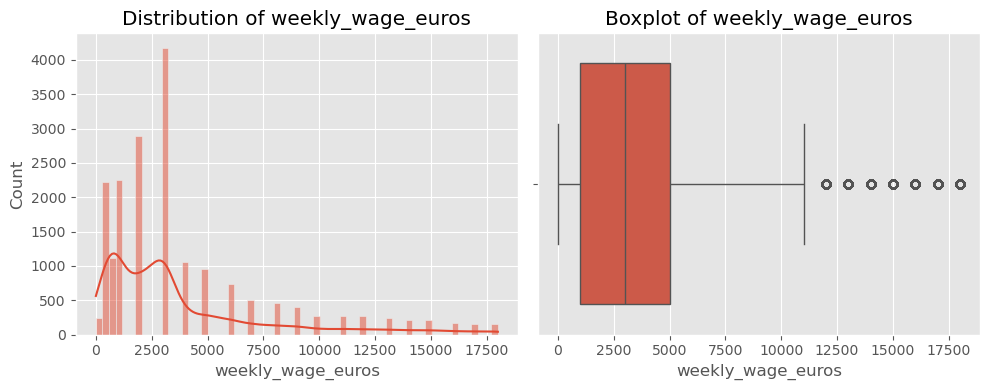

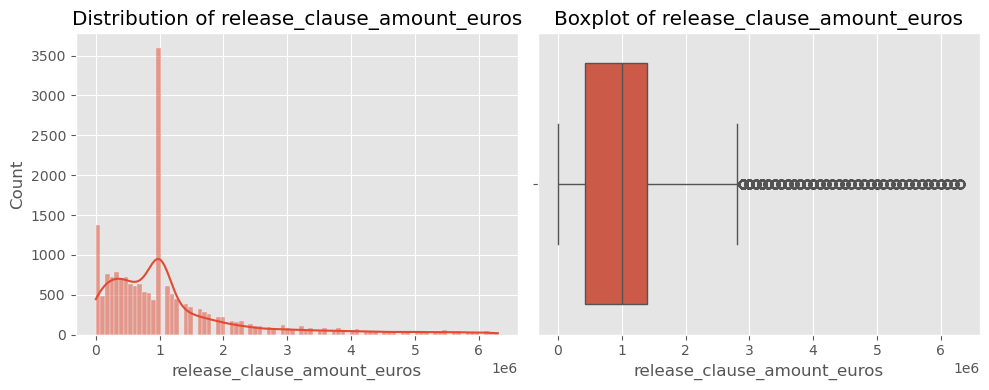

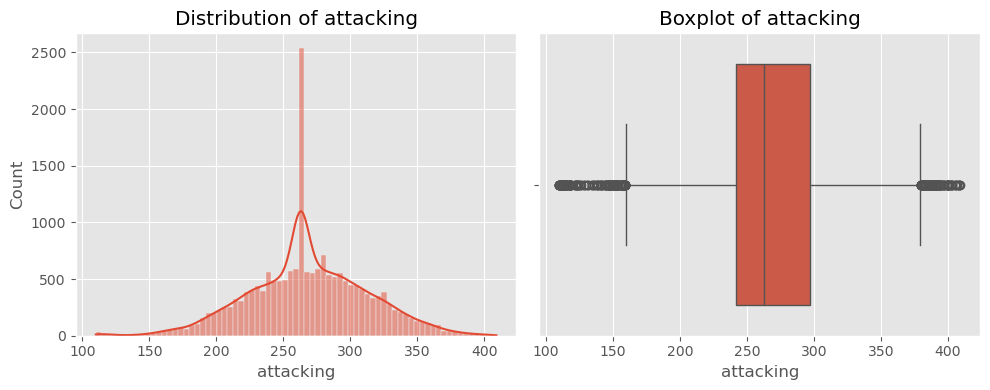

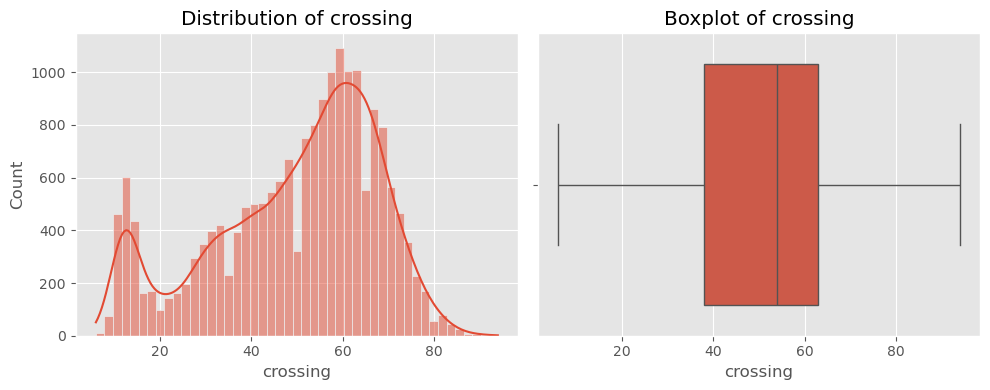

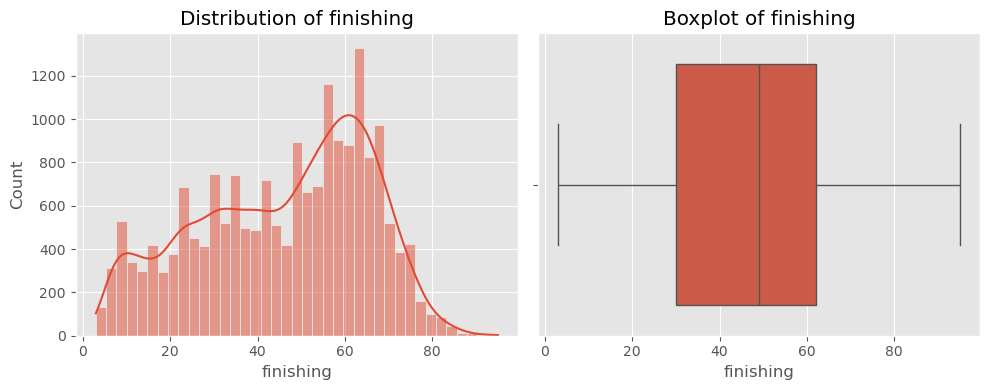

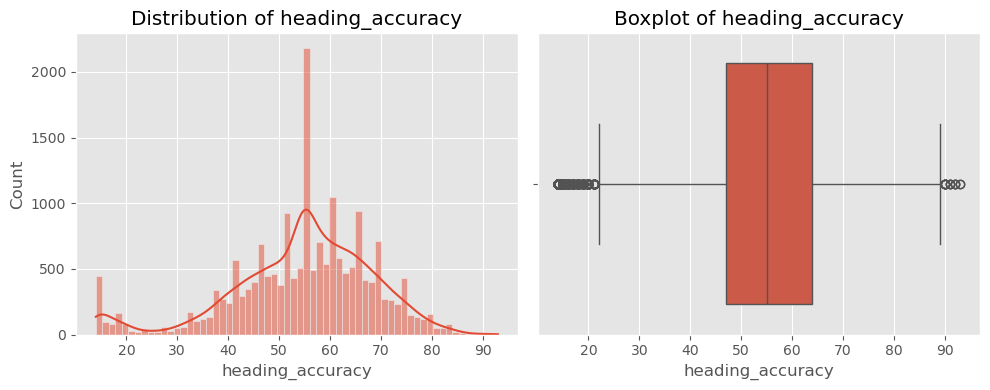

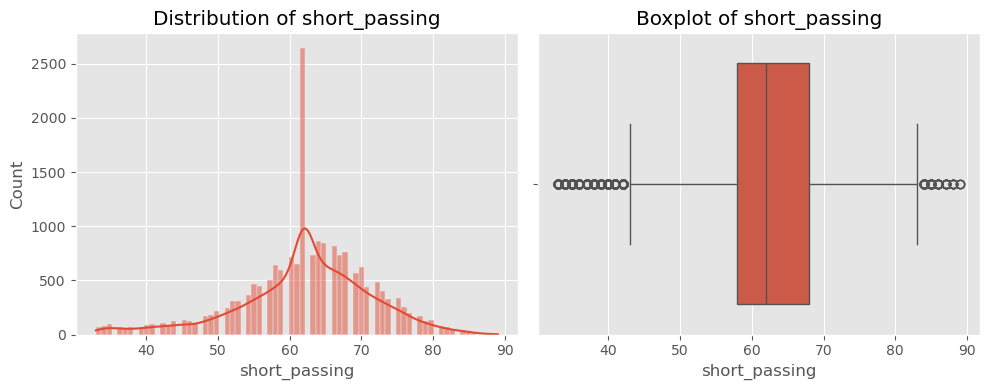

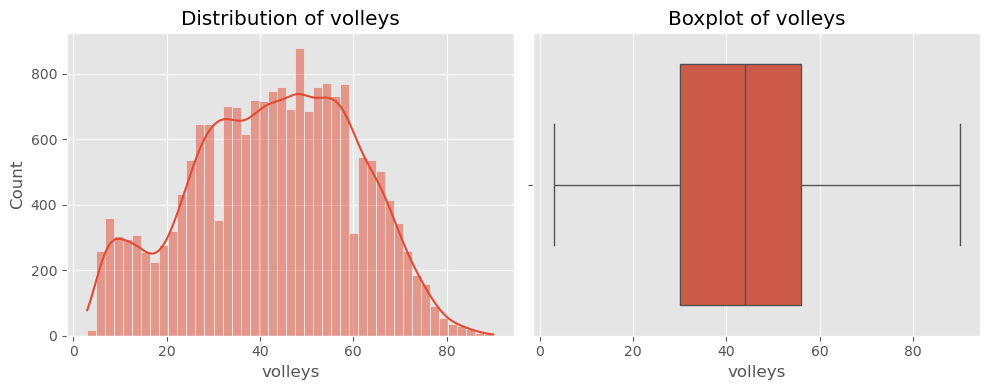

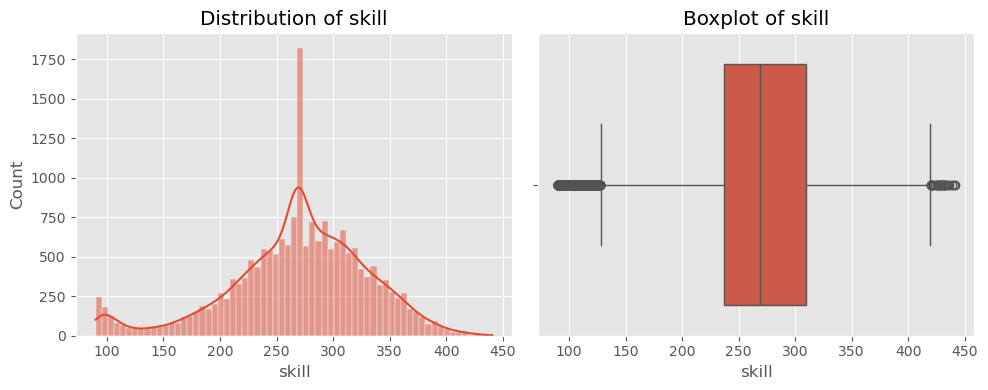

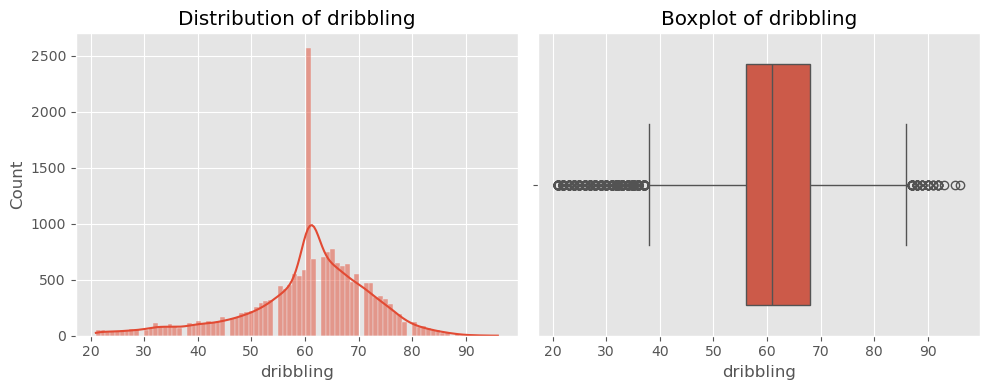

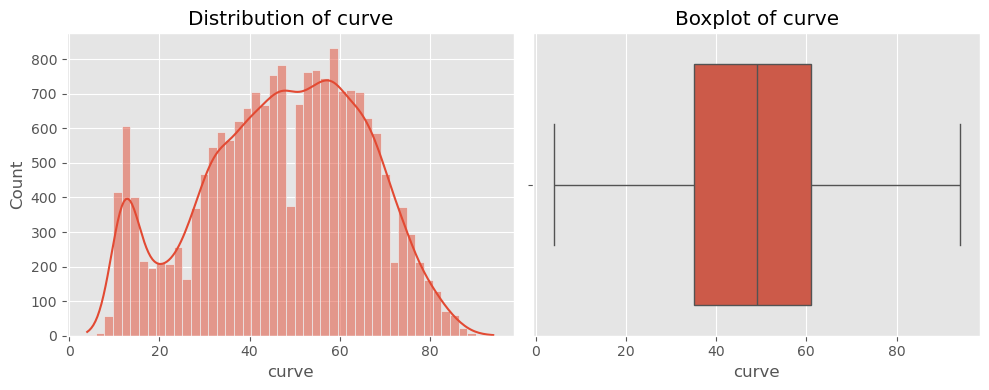

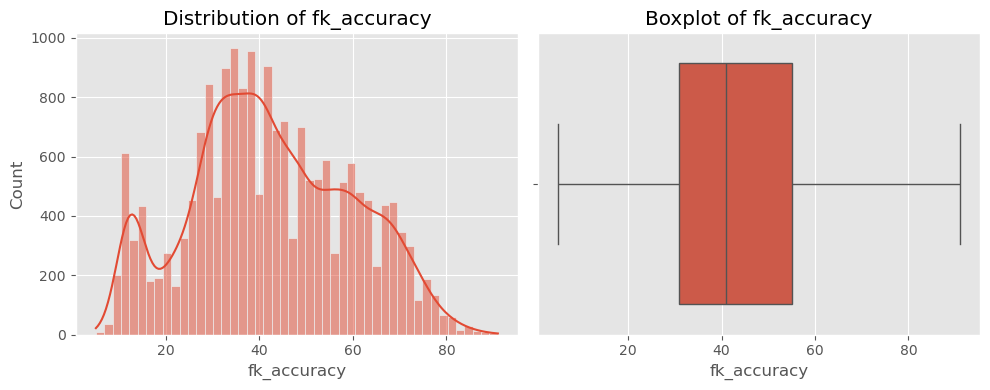

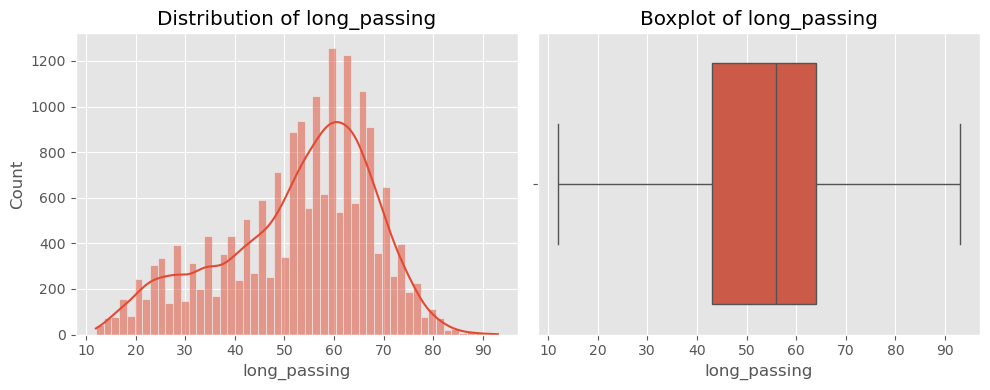

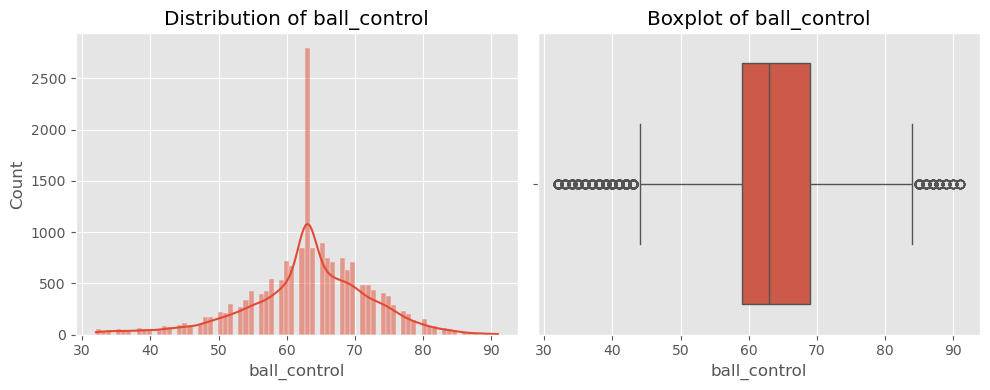

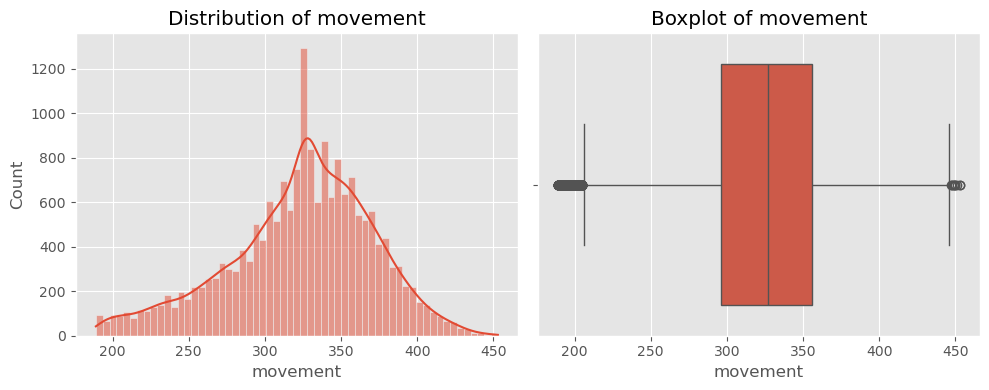

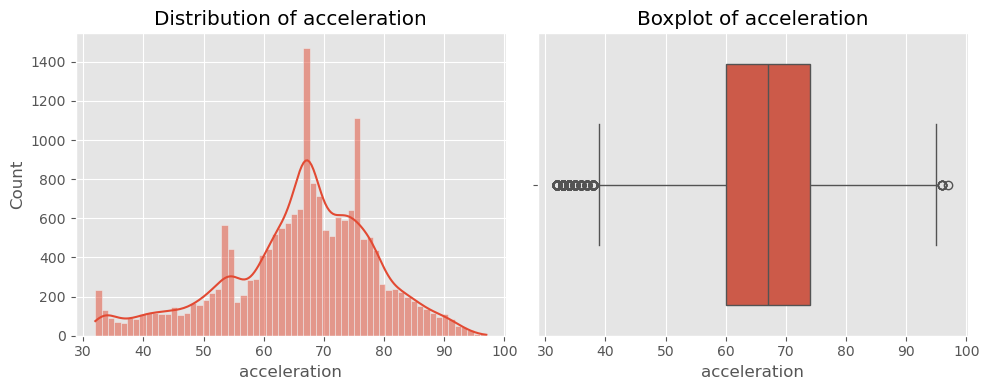

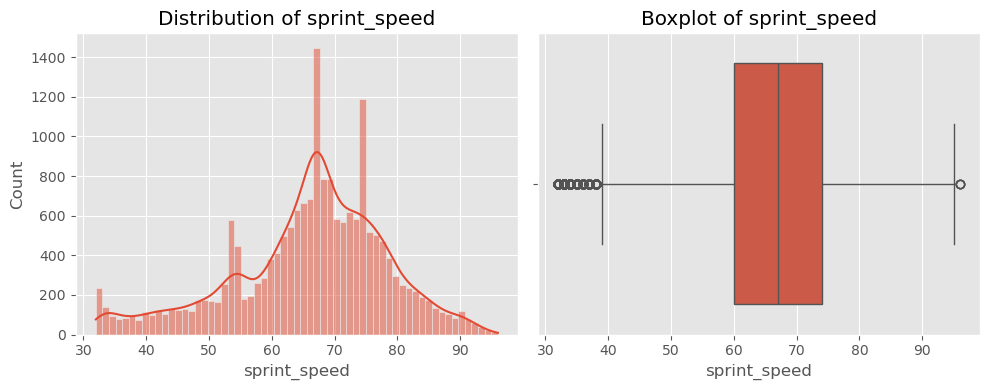

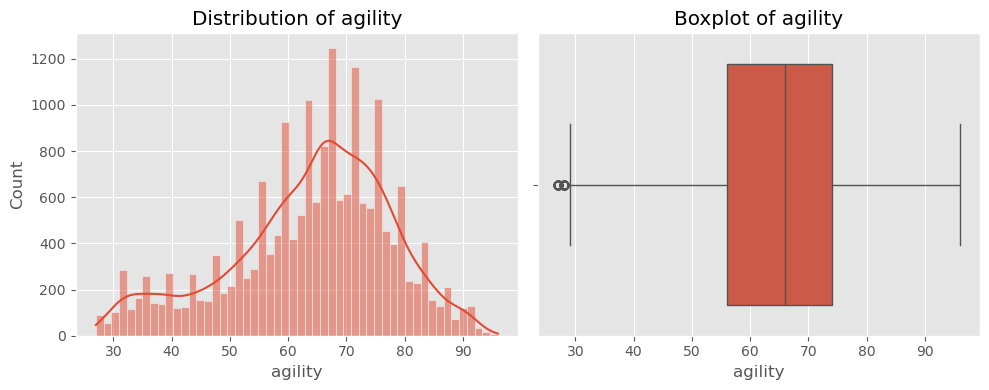

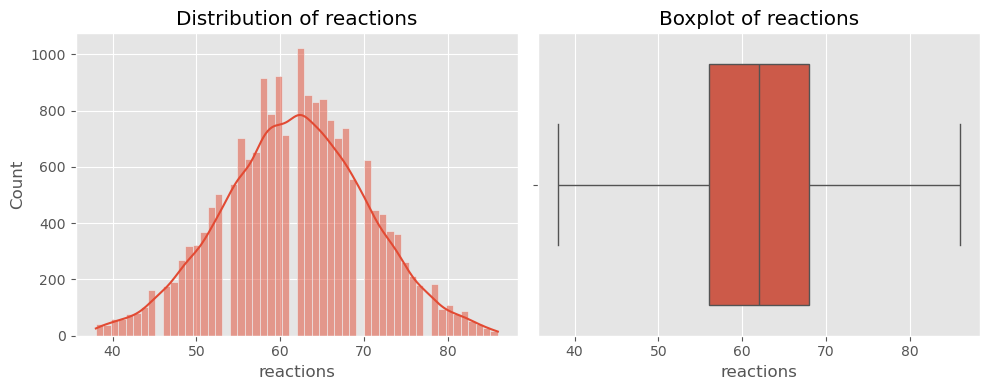

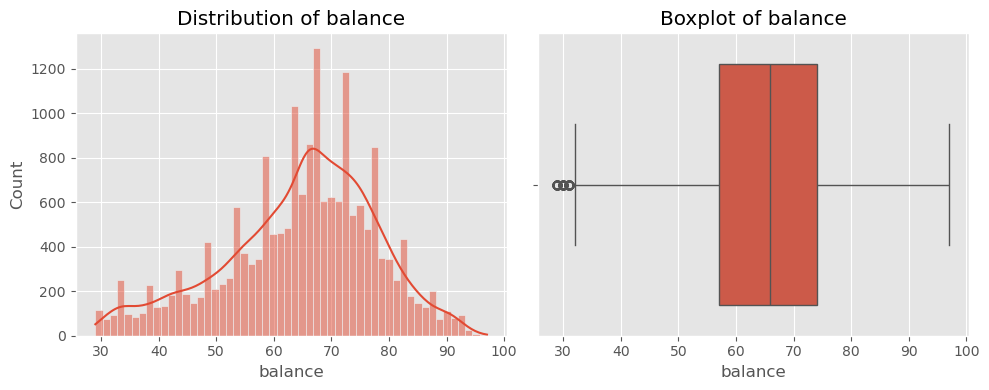

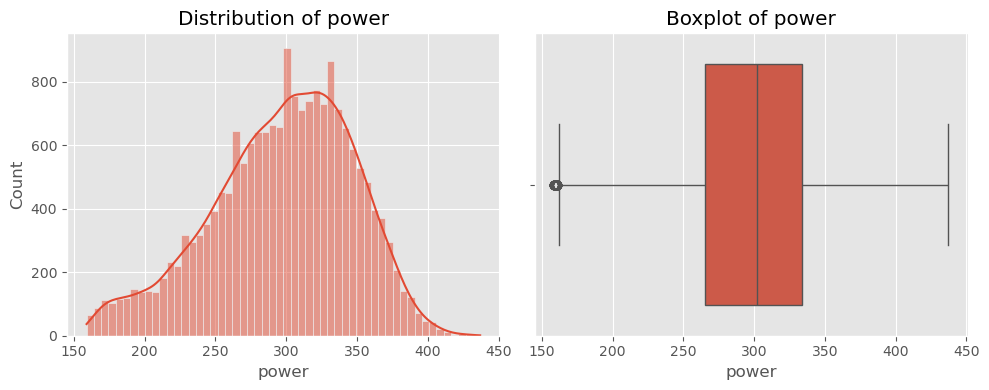

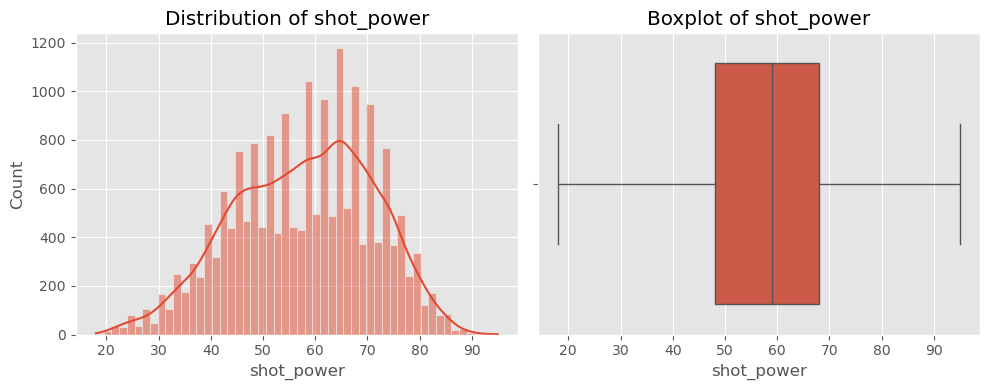

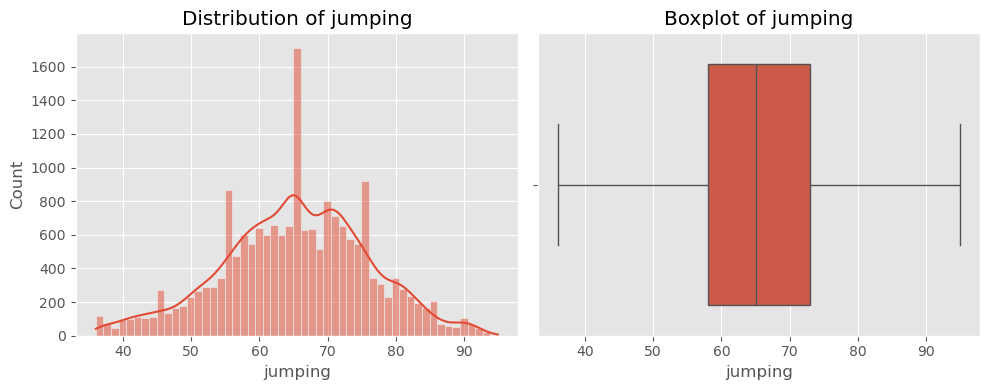

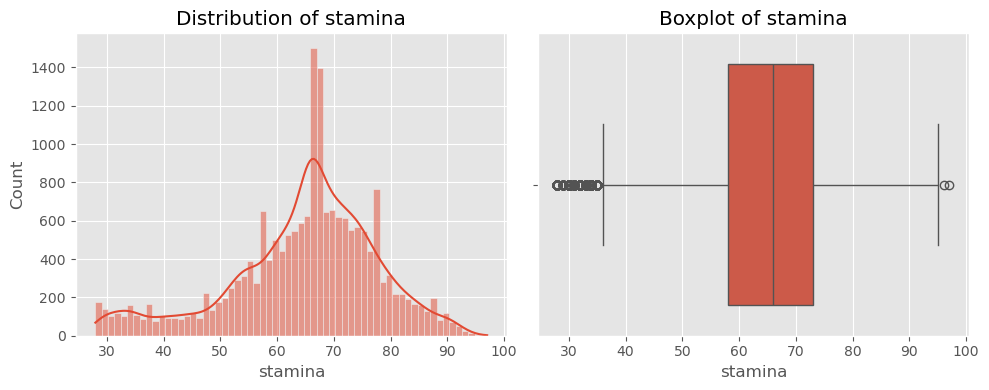

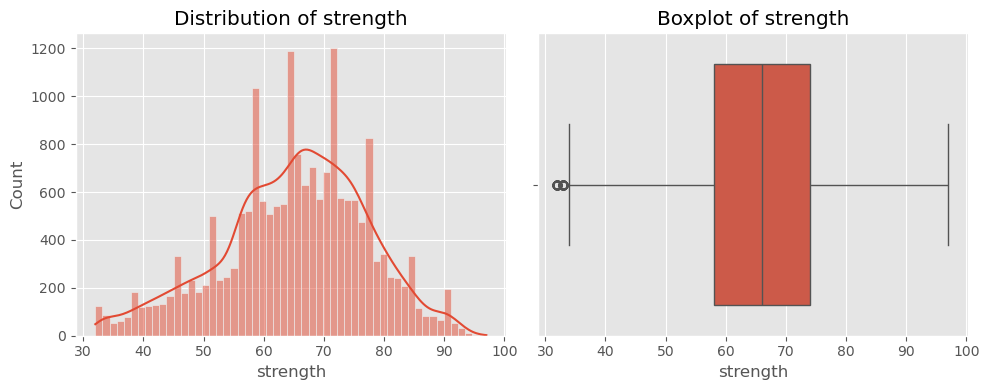

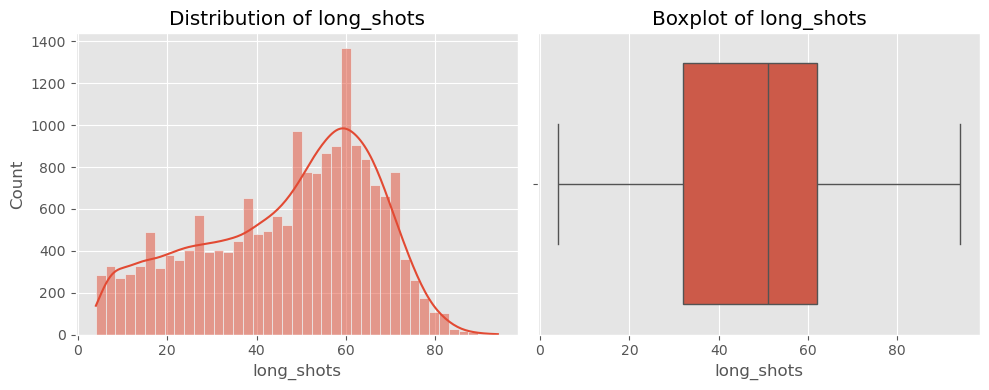

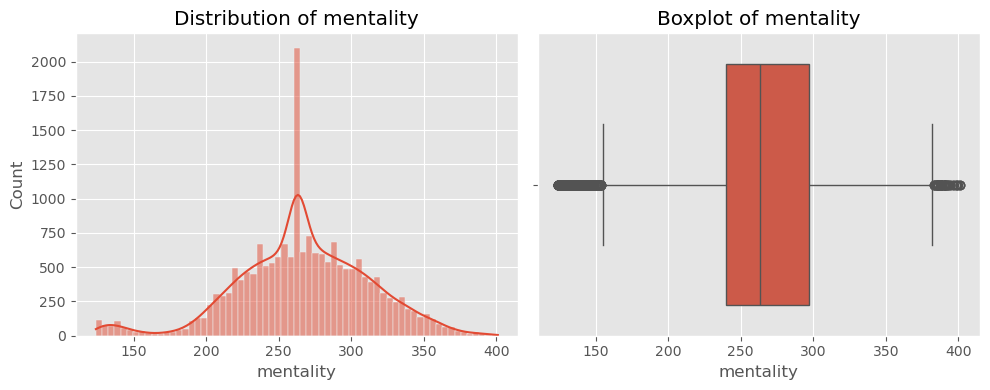

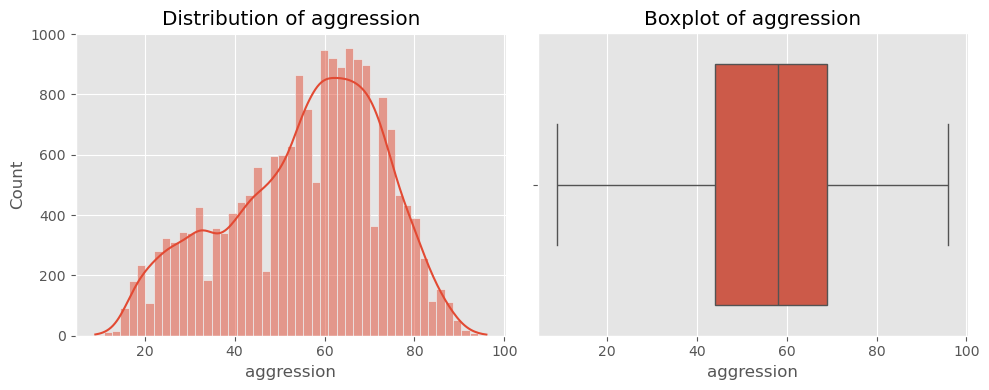

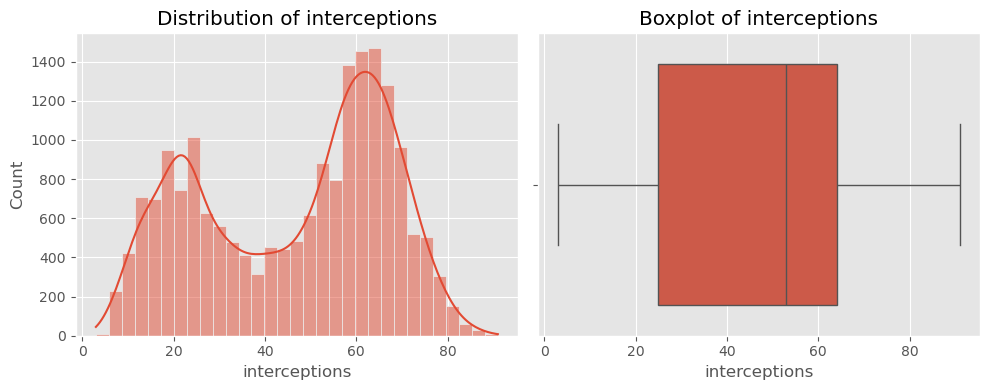

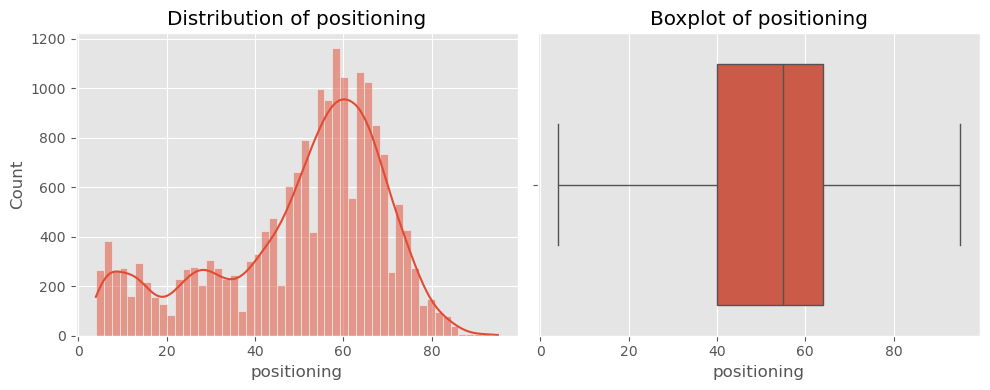

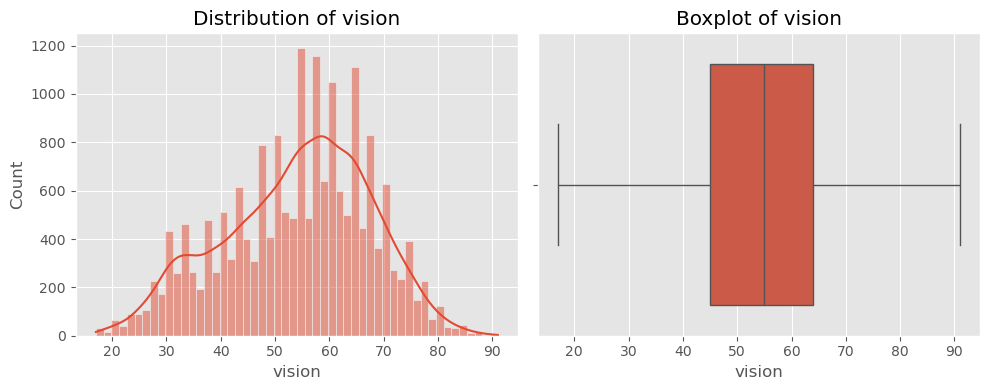

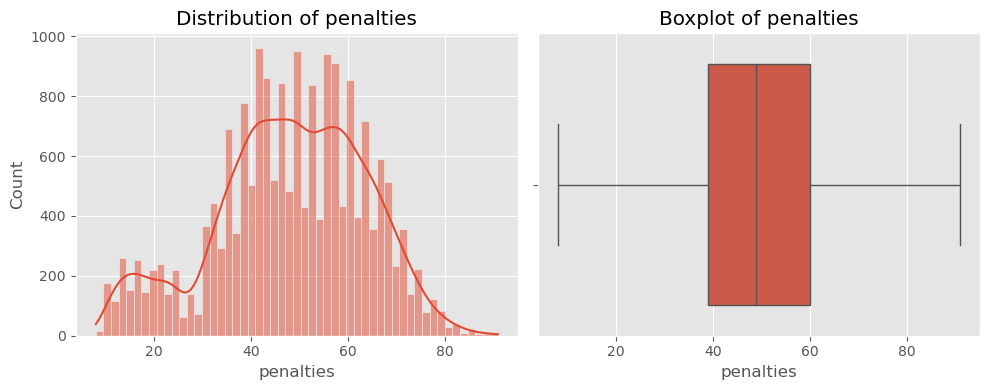

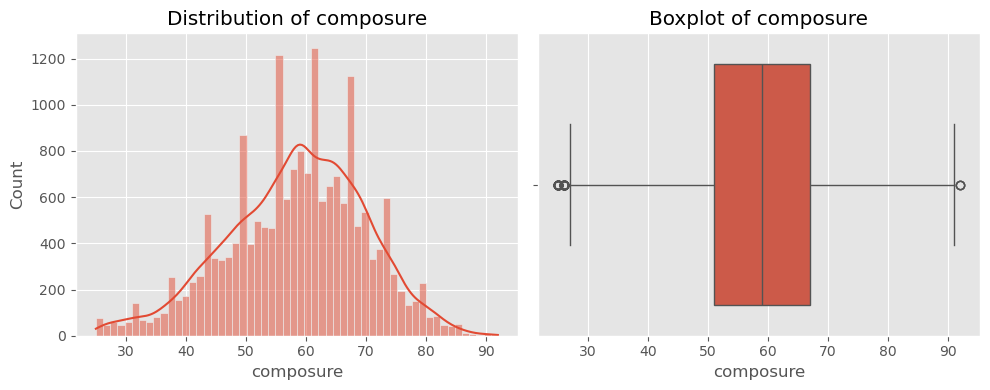

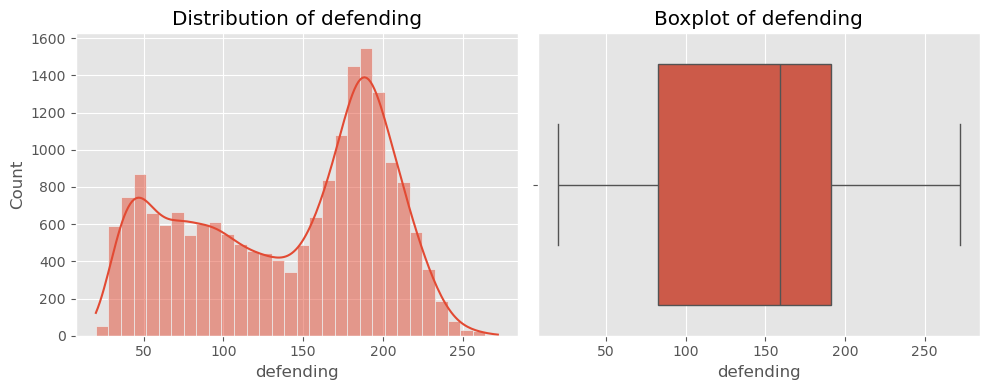

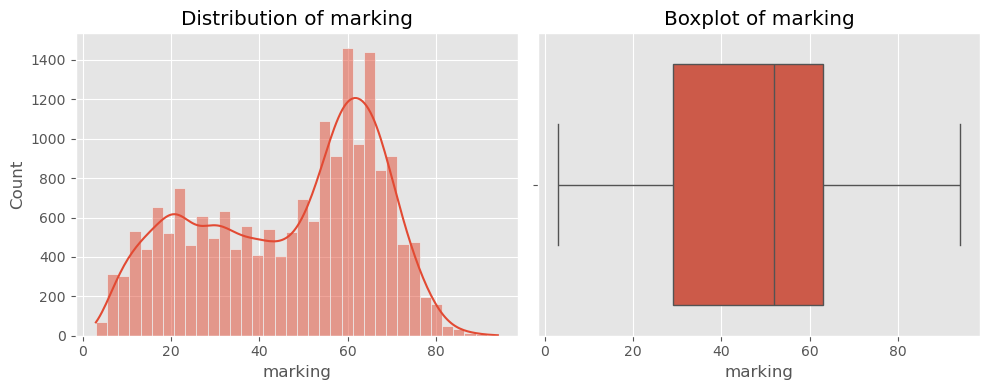

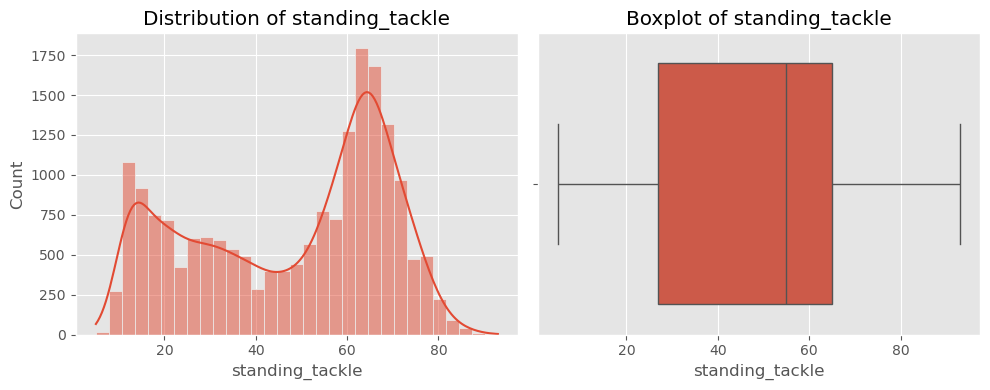

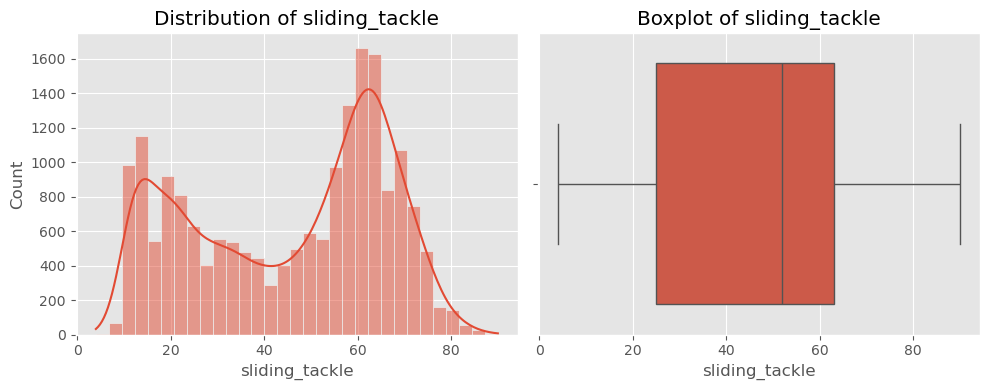

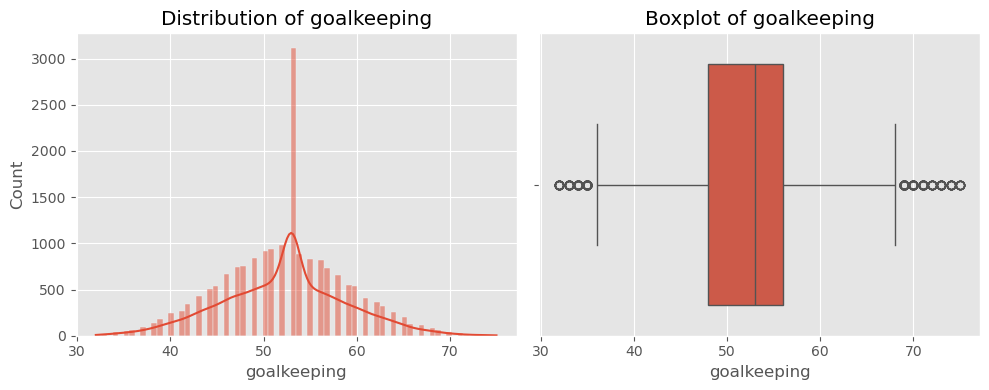

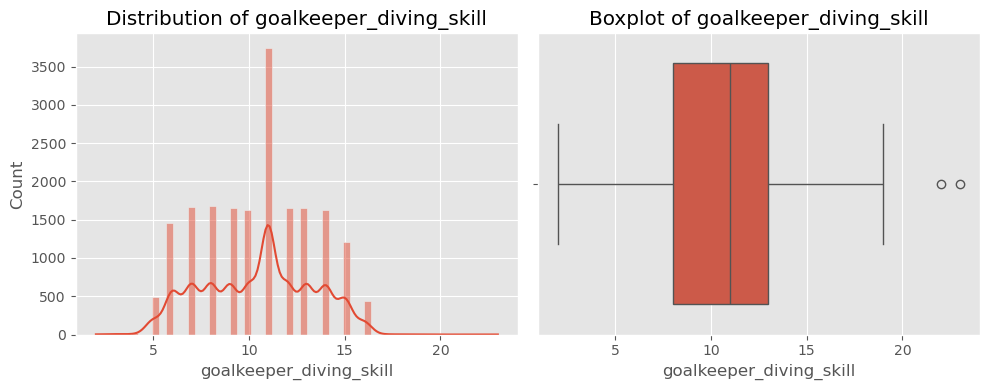

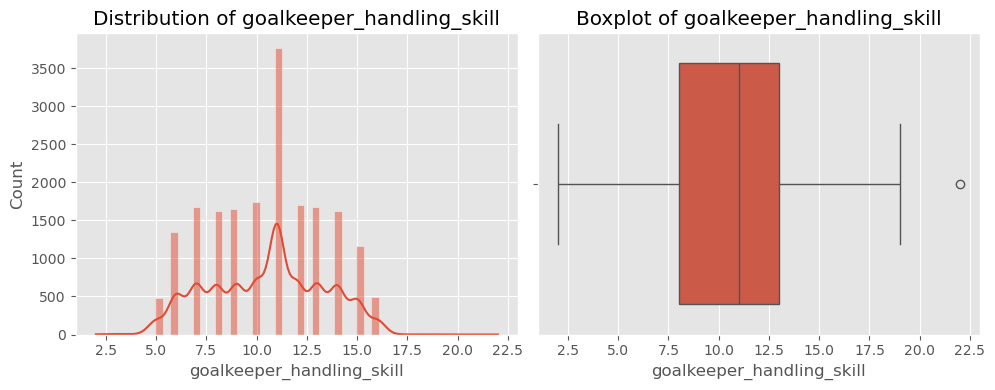

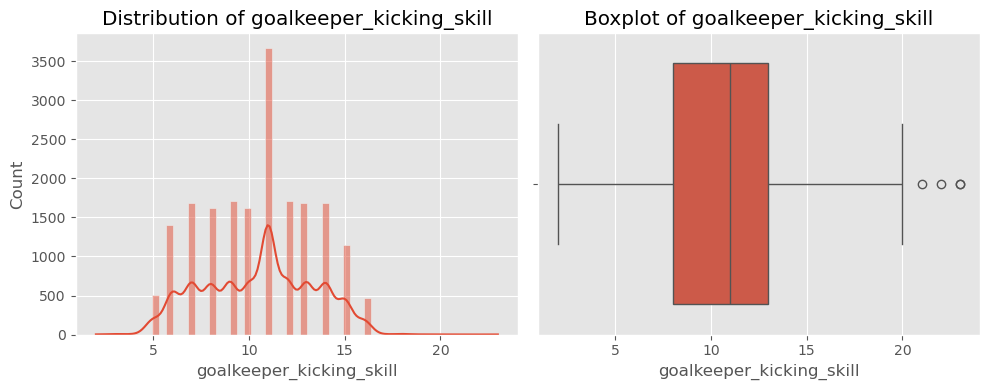

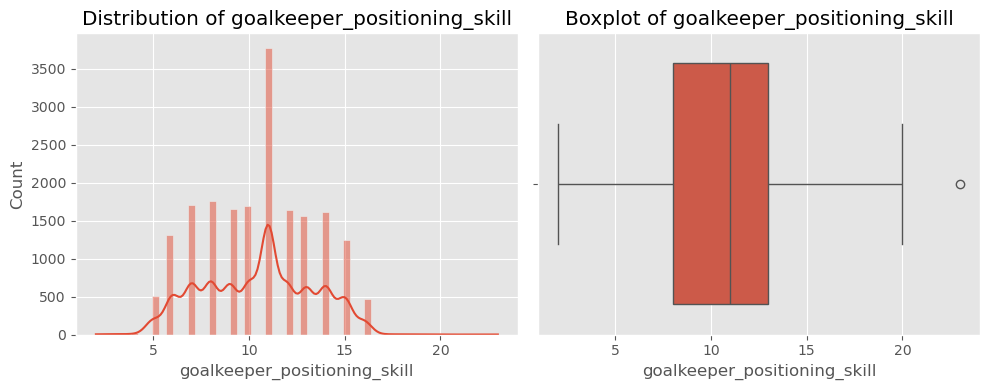

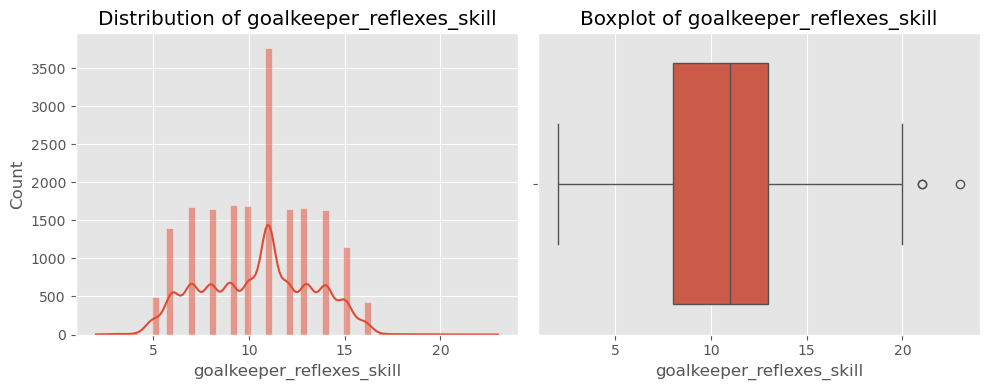

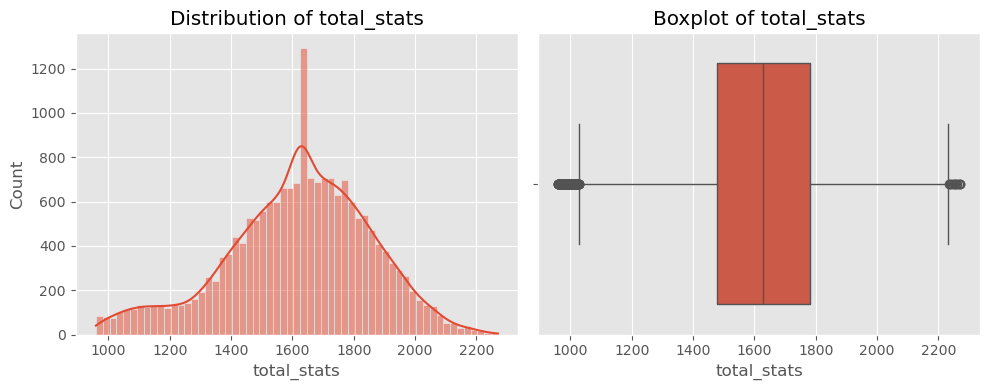

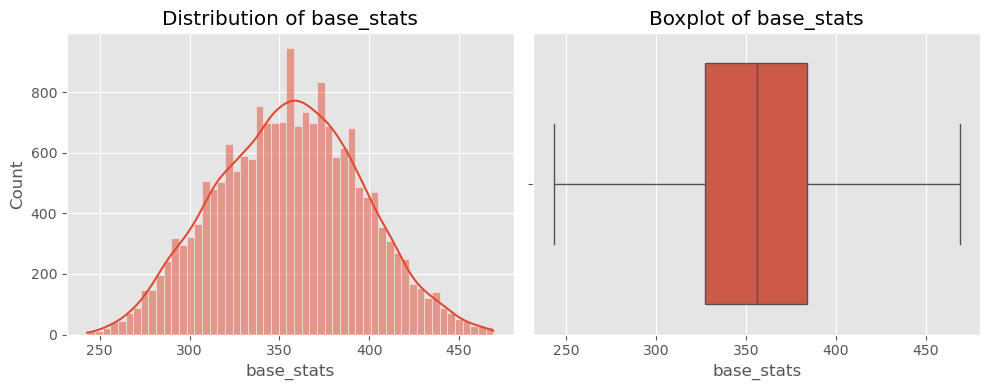

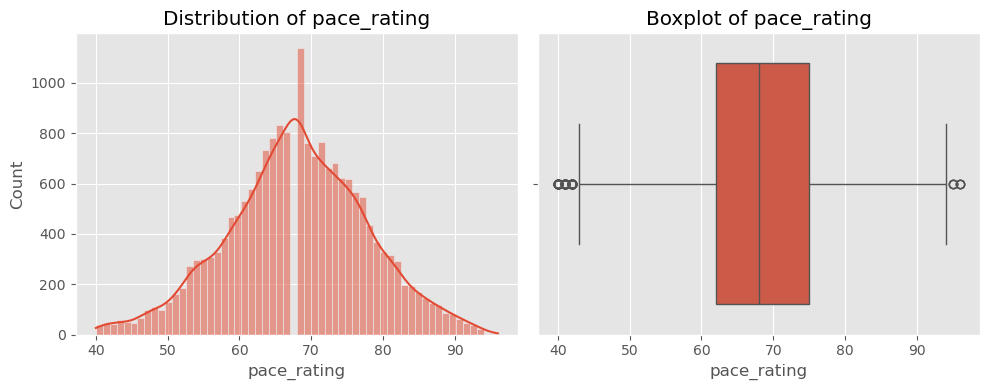

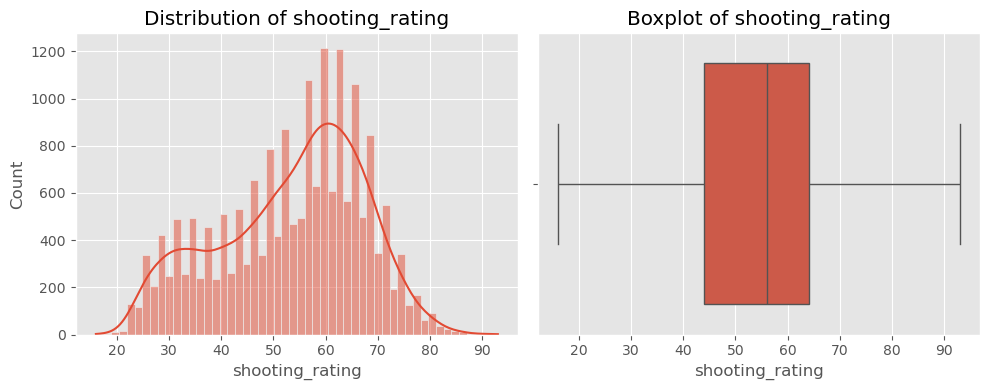

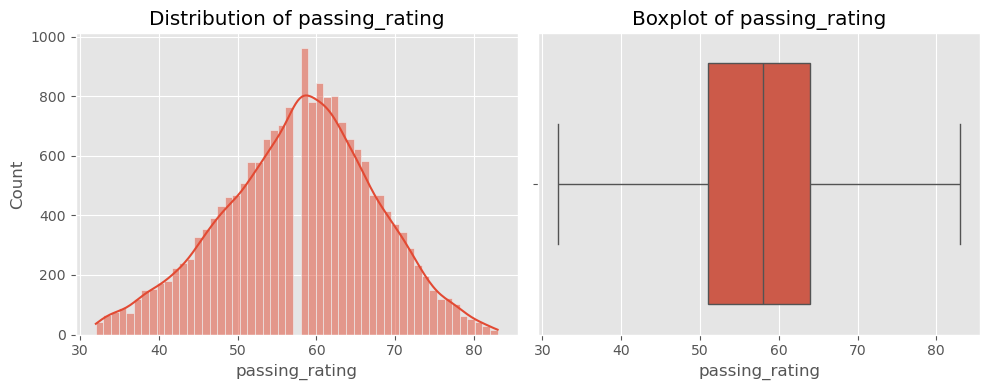

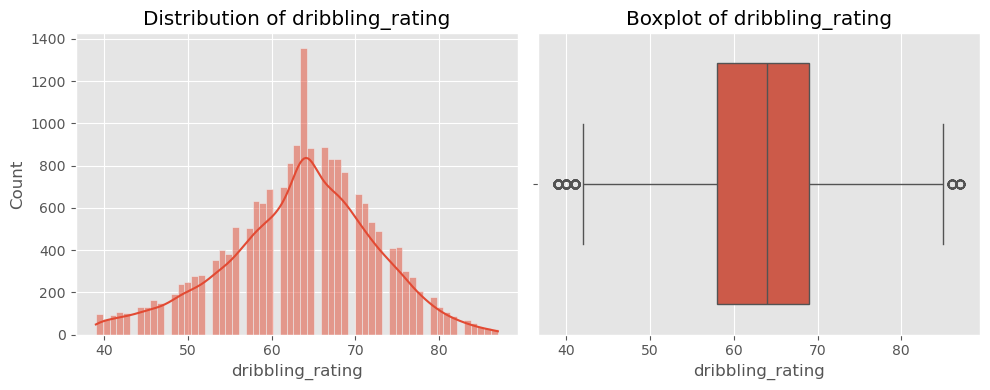

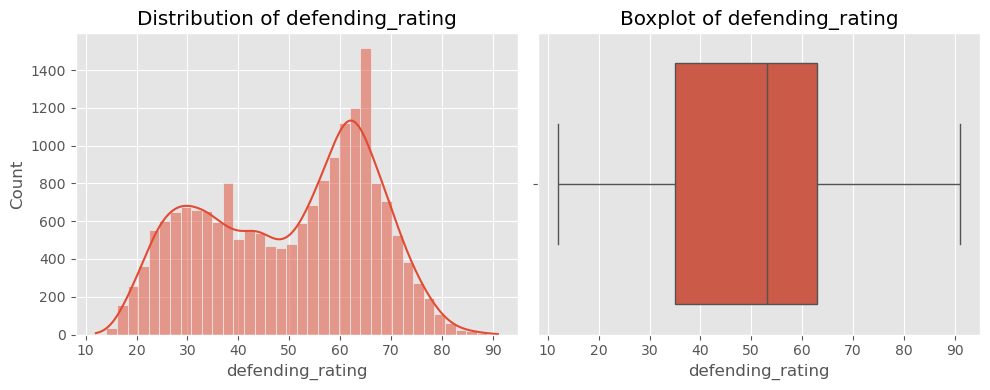

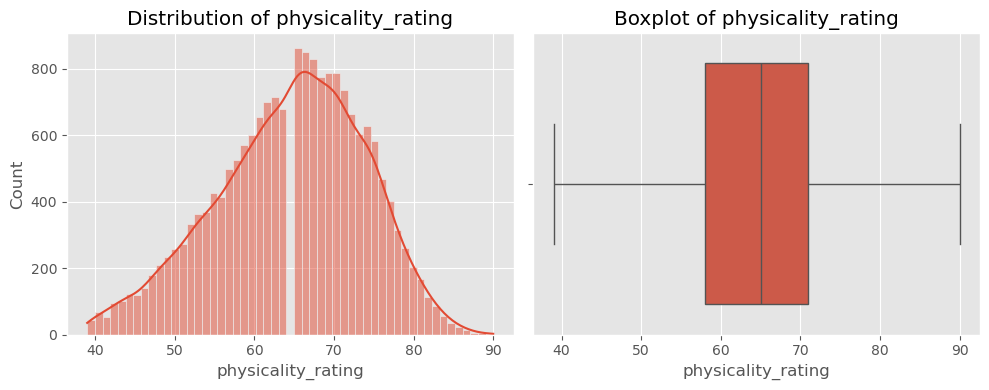

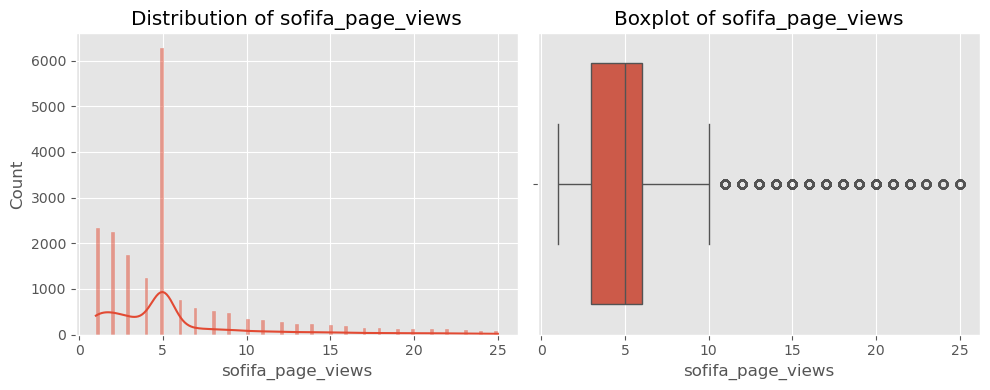

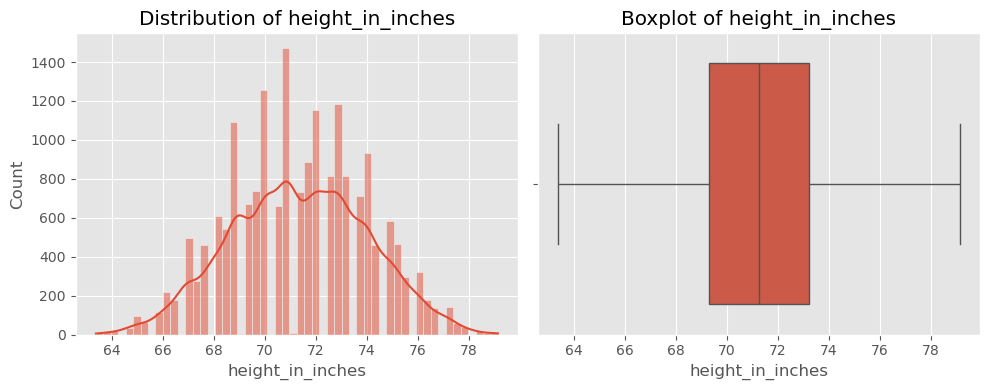

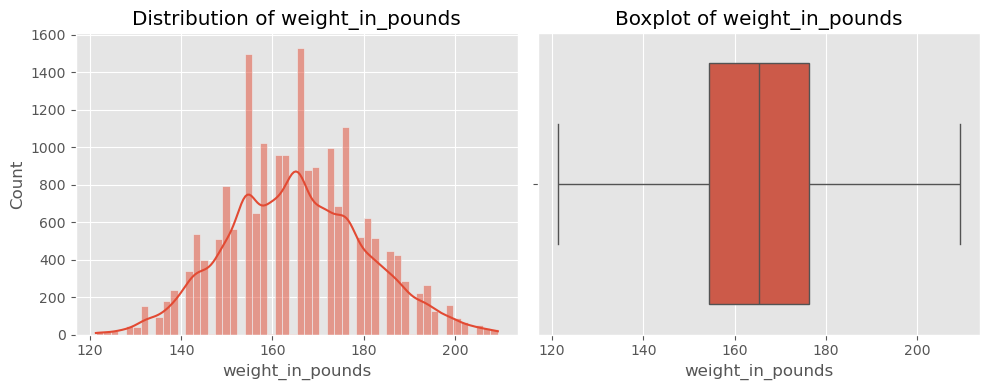

In [121]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Plot each numeric column
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

### 7.3 Validate Against Known Ranges:
Check numerical values against known ranges (e.g., age should be within a reasonable range). Flag or correct values outside these ranges.


In [123]:
# Example: Ensure 'age' is within a reasonable range
reasonable_age_range = (0, 100)  # Adjust as necessary

age = df[df['age'].between(reasonable_age_range[0], reasonable_age_range[1])]



4. Consistent Categorization:
Ensure categorical data is consistently categorized. For instance, the same category shouldn't be spelled in multiple ways.

In [125]:
# Standardize country names (capitalize)

df['nationality'] = df['nationality'].str.title()  


In [126]:
df.head()

,id,longname,nationality,age,overall_rating,potential,club,positions,preferred_foot,best_overall_rating,best_position,joined,loan_date_end,market_value_euros,weekly_wage_euros,release_clause_amount_euros,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,goalkeeper_diving_skill,goalkeeper_handling_skill,goalkeeper_kicking_skill,goalkeeper_positioning_skill,goalkeeper_reflexes_skill,total_stats,base_stats,weak_foot_rating,skill_moves_rating,attacking_work_rate,defensive_work_rate,international_reputation,pace_rating,shooting_rating,passing_rating,dribbling_rating,defending_rating,physicality_rating,sofifa_page_views,is_on_loan,contract_start_year,contract_end_year,height_in_inches,weight_in_pounds
0,158023.0,Lionel Messi,Argentina,33.0,66.0,71.0,Barcelona,"RW, ST, CF",Left,67.0,RW,2004-07-01,NaT,950000.0,3000.0,1000000.0,263.0,85.0,95.0,70.0,62.0,88.0,269.0,96.0,93.0,41.0,91.0,63.0,451.0,91.0,80.0,91.0,62.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44.0,40.0,93.0,55.0,75.0,59.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8.0,2231.0,466.0,4,4,Medium,Low,5,85.0,92.0,58.0,64.0,38.0,65.0,5.0,False,2004,2021,66.929170,158.73264
1,232418.0,C. Ronaldo dos Santos Aveiro,Portugal,35.0,66.0,71.0,Juventus,"ST, LW",Right,67.0,ST,2018-07-10,NaT,950000.0,3000.0,1000000.0,263.0,84.0,95.0,90.0,82.0,86.0,414.0,88.0,81.0,76.0,77.0,63.0,431.0,87.0,91.0,87.0,62.0,71.0,302.0,94.0,95.0,84.0,78.0,93.0,353.0,63.0,29.0,95.0,82.0,84.0,59.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11.0,2221.0,464.0,4,5,High,Low,5,89.0,93.0,81.0,64.0,35.0,77.0,5.0,False,2018,2022,73.622087,182.98346
2,200389.0,Jan Oblak,Slovenia,27.0,66.0,71.0,Atletico Madrid,GK,Right,67.0,GK,2014-07-16,NaT,950000.0,3000.0,1000000.0,263.0,13.0,11.0,15.0,43.0,13.0,109.0,61.0,13.0,14.0,40.0,63.0,307.0,43.0,60.0,67.0,62.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34.0,19.0,11.0,65.0,11.0,68.0,57.0,27.0,12.0,18.0,53.0,11.0,11.0,11.0,11.0,11.0,1413.0,356.0,3,1,Medium,Medium,3,87.0,92.0,78.0,64.0,52.0,90.0,5.0,False,2014,2023,74.015788,191.80194
3,192985.0,Kevin De Bruyne,Belgium,29.0,66.0,71.0,Manchester City,"CAM, CM",Right,67.0,CAM,2015-08-30,NaT,950000.0,3000.0,1000000.0,407.0,94.0,82.0,55.0,62.0,82.0,441.0,88.0,85.0,83.0,93.0,63.0,398.0,77.0,76.0,78.0,62.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,263.0,76.0,66.0,88.0,55.0,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13.0,1627.0,356.0,5,4,High,High,4,76.0,86.0,58.0,64.0,64.0,78.0,5.0,False,2015,2023,71.259881,154.32340
4,190871.0,Neymar da Silva Santos Jr.,Brazil,28.0,66.0,71.0,Parisint-Germain,"LW, CAM",Right,67.0,LW,2017-08-03,NaT,950000.0,3000.0,1000000.0,408.0,85.0,87.0,62.0,87.0,87.0,269.0,95.0,88.0,89.0,81.0,63.0,453.0,94.0,89.0,96.0,62.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51.0,36.0,87.0,90.0,49.0,59.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11.0,2175.0,451.0,5,5,High,Medium,5,91.0,85.0,58.0,64.0,36.0,59.0,5.0,False,2017,2022,68.897675,149.91416


In [127]:
df.isna().sum().sort_values(ascending = False).head(10)

loan_date_end                   17966
id                                  0
standing_tackle                     0
goalkeeper_positioning_skill        0
goalkeeper_kicking_skill            0
goalkeeper_handling_skill           0
goalkeeper_diving_skill             0
goalkeeping                         0
sliding_tackle                      0
marking                             0
dtype: int64

In [128]:
df.to_csv('clean_dataset.csv')